# **SyriaTel Customer Churn Prediction**

## **Project Overview**  

The SyriaTel Customer Churn project aims to address the high rate of customer attrition within the telecommunications sector. Leveraging customer data such as service plans, call activity, and account details, we will build robust classification models to predict whether a customer is likely to churn. By understanding these patterns, SyriaTel can proactively enhance customer retention strategies, improve customer satisfaction, and reduce financial losses.   

### **Stakeholder:**  

SyriaTel, a telecommunications company, is the key stakeholder for this project. The insights derived from this analysis will inform their strategic decisions to minimize churn rates.   

## **Business Understanding**   

SyriaTel is experiencing high customer churn, negatively affecting revenue and growth. The company seeks to understand the factors contributing to churn and develop a predictive model to identify at-risk customers. By predicting churn, SyriaTel can intervene with targeted retention strategies, ensuring a more stable customer base.  

### **Data Description:**  

The dataset contains various customer-related attributes, including usage metrics and service plan details. Key variables include:   

`State:` The customer's location, represented as a categorical variable.  
`Account Length:` Duration of the customer's account in days.  
`Area Code:` Numeric representation of the customer's area code.  
`International Plan:` Whether the customer has subscribed to an international calling plan.  
`Voice Mail Plan:` Subscription status to a voicemail plan.  
`Total Day/Eve/Night/Intl Minutes:` Usage minutes during different time segments.  
`Total Day/Eve/Night/Intl Calls:` Call counts across different time segments.  
`Total Day/Eve/Night/Intl Charge:` Charges accrued in different time segments.  
`Customer Service Calls:` Number of calls made to customer service.  
`Churn:` The target variable indicating whether the customer has churned (True/False).  

## **Problem Statement**  

SyriaTel is losing customers at an alarming rate, impacting its revenue and market position. The company needs a data-driven approach to understand churn dynamics, enabling proactive measures to retain customers. The primary goal is to build a model that can accurately predict customer churn and provide actionable insights to improve retention strategies.   

## **Objectives**  

**1. Identify Key Determinants of Customer Churn**  
**2. Model Selection and Performance Evaluation**   
**3. Provide Recommendations for Retention Strategies**  





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Import Dataset**

In [2]:
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Explatory Data Analysis

now I will explore the data to get insights about the data

In [3]:
df.shape

(3333, 21)

In [4]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [5]:
col_names = df.columns
col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Types of variables  

In this section, I separate the dataset into categorical and numerical variables.

In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [8]:
# view the categorical variables

df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


## Explore Problems within Categorical Variables

In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

In [10]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64
international plan
no     3010
yes     323
Name: count, dtype: int64
voice mail plan
no     2411
yes     922
Name: count, dtype: int64


In [11]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


    Phone number has very high cardinality which might not be useful for the model. Phone numbers are typically unique identifiers and don't provide meaningful information for prediction. I might consider dropping it.

In [12]:
# drop the phone number variable

df.drop('phone number', axis=1, inplace=True)

## Feature Engineering

### Explore `State` Variable

In [13]:
# print number of labels in state variable

print('State contains', len(df['state'].unique()), 'labels')

State contains 51 labels


In [14]:
# check labels in state variable

df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
# check frequency distribution of values in state variable

df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

### Explore `international plan` Variable

In [16]:
# print number of labels in International variable

print('International plan contains', len(df['international plan'].unique()), 'labels')

International plan contains 2 labels


In [17]:
# check frequency distribution of values in international plan variable

df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [18]:
pd.get_dummies(df['international plan'], drop_first=False, dtype='int').head()



,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


### Explore `voice mail plan` Variable

In [19]:
# print number of labels in Voice mail plan variable

print('voice mail plan contains', len(df['voice mail plan'].unique()), 'labels')

voice mail plan contains 2 labels


In [20]:
# check frequency distribution of values in voice mail plan variable

df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [21]:
pd.get_dummies(df['voice mail plan'], drop_first=False, dtype='int').head()



,no,yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


#### Frequency of categorical features

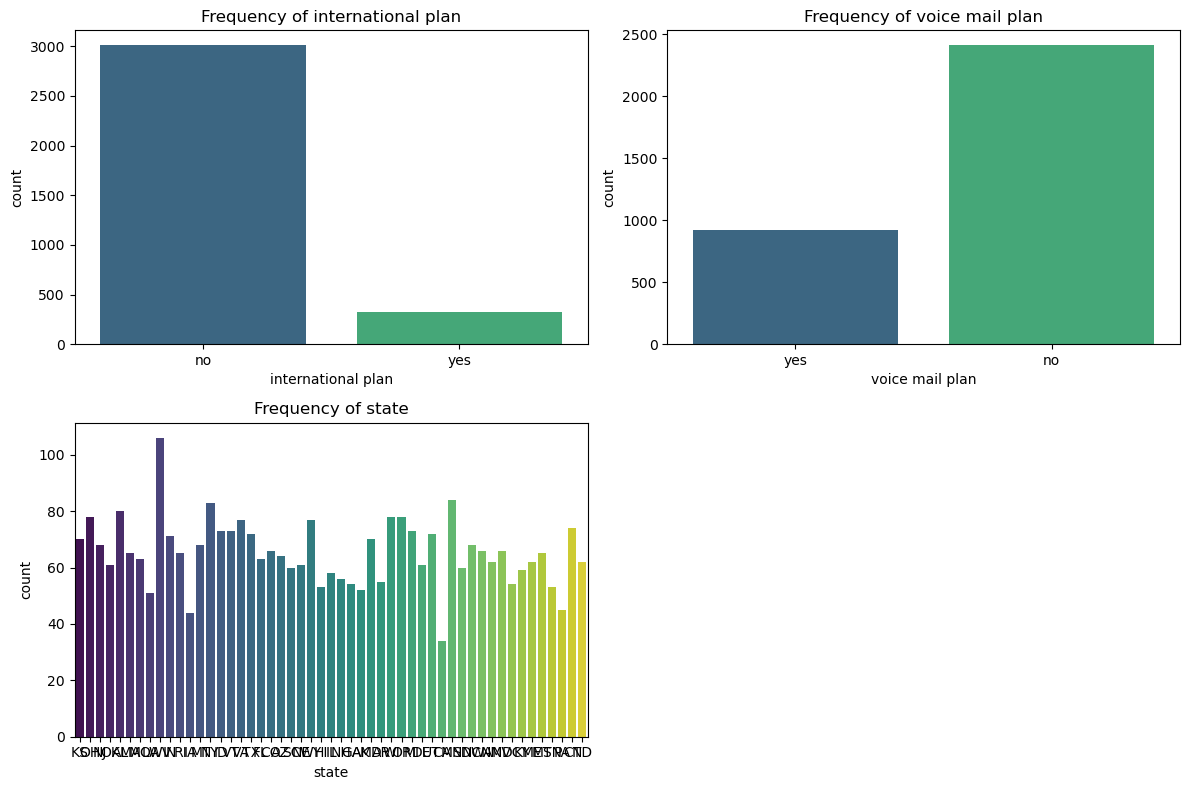

In [22]:
# List of categorical features to plot
import seaborn as sns
categorical_features = ['international plan', 'voice mail plan', 'state']

# Plotting bar plots for categorical variables
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Frequency of {feature}')
plt.tight_layout()
plt.show()


**1. International Plan**  

    Observation: A large majority of customers do not have an international plan. Only a small fraction of the customers have subscribed to it.  
    Interpretation: This skewed distribution suggests that having an international plan is not common among customers. This variable could still be significant if having an international plan correlates with churn, especially if customers with the plan are more or less likely to churn.  

**2. Voice Mail Plan**  

    Observation: Most customers do not have a voicemail plan, while a smaller proportion does have one.  
    Interpretation: Similar to the international plan, the voice mail plan is less frequently used among customers. Analyzing the relationship between having a voicemail plan and churn will help determine if this feature plays a role in predicting churn.  

**3. State**  

    Observation: The state variable shows a fairly even distribution across various states, with some states having slightly more customers than others.  
    Interpretation: The state variable doesn't show any extreme imbalances. However, the relationship between different states and churn can reveal if geographical location influences customer behavior, possibly due to regional service quality or marketing strategies.

### Cross-Tabulation with Churn

In [23]:


# Cross-tabulation for International Plan vs. Churn
international_plan_ct = pd.crosstab(df['international plan'], df['churn'])
print(international_plan_ct)

# Cross-tabulation for Voice Mail Plan vs. Churn
voice_mail_plan_ct = pd.crosstab(df['voice mail plan'], df['churn'])
print(voice_mail_plan_ct)

# Cross-tabulation for State vs. Churn
state_ct = pd.crosstab(df['state'], df['churn'])
print(state_ct)


churn               False  True 
international plan              
no                   2664    346
yes                   186    137
churn            False  True 
voice mail plan              
no                2008    403
yes                842     80
churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH      

### Countplots for Categorical variables Vs Churn

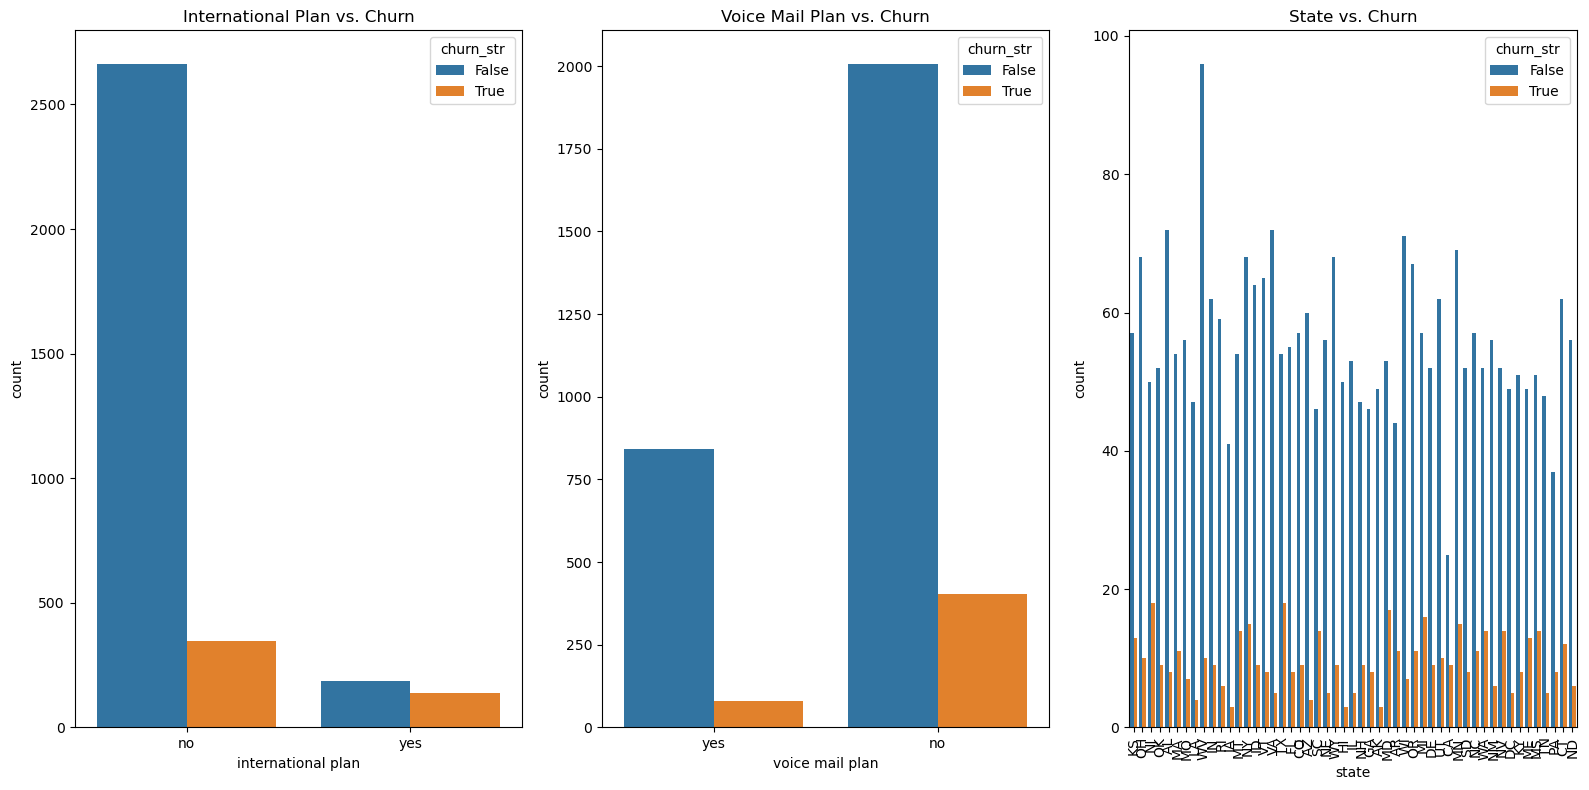

In [24]:
df['churn_str']  = df['churn'].astype(str)
# Set up the figure size
plt.figure(figsize=(16, 8))

# Count plot for International Plan vs. Churn
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='international plan', hue='churn_str')
plt.title('International Plan vs. Churn')

# Count plot for Voice Mail Plan vs. Churn
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='voice mail plan', hue='churn_str')
plt.title('Voice Mail Plan vs. Churn')

# Count plot for State vs. Churn (rotated x-axis labels for better readability)
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='state', hue='churn_str')
plt.title('State vs. Churn')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### **Interpretation of the Plots**  

**1. International Plan vs. Churn:**

    Customers without the international plan are significantly less likely to churn compared to those with the plan.
    A higher proportion of customers with the international plan churn compared to those without it, indicating that having an international plan is associated with higher churn rates.
  
**2. Voice Mail Plan vs. Churn:**  

    Customers with the voice mail plan are less likely to churn compared to those without it.
    The churn rate is higher among customers who do not have the voice mail plan, suggesting that not having this plan might be associated with increased churn.  
  
**3. State vs. Churn:**  

    The churn rates are fairly consistent across different states, with no particular state showing an extremely high or low churn rate compared to others.  
    The variation in churn rates across states does not seem substantial, suggesting that the state variable might not be a strong predictor of churn.  

**Conclusion**  

    State Variable: Given the visual analysis, the state does not appear to have a significant impact on churn, as there is no clear pattern or significant differences in churn rates across states. Dropping this variable might be appropriate inorder to simplify the model.  
    
    International and Voice Mail Plans: These variables show clear differences in churn rates, making them important features to include in your analysis or predictive model.  




### Exploring Numerical Variables

In [25]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [26]:
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploring Numerical Variables

In [27]:


# check missing values in numerical variables

df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [28]:
df[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [29]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

In [30]:
class BoxplotVisualizer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def draw_boxplots(self):
        # Set the style of seaborn for better aesthetics
        sns.set(style="whitegrid")
        
        # Iterate through each numerical column in the dataframe
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10, 5))  # Set the size of the figure
            sns.boxplot(x=self.dataframe[column])
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()

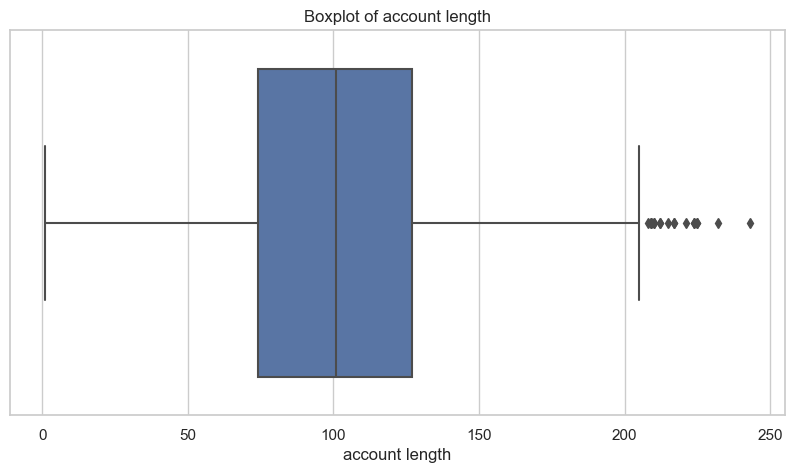

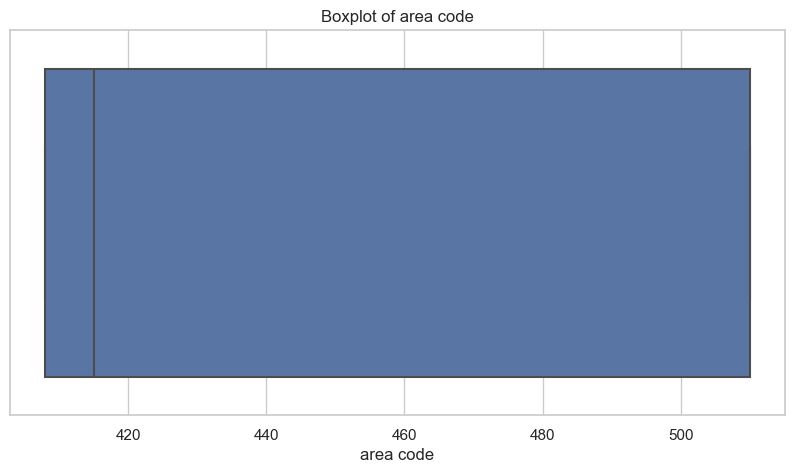

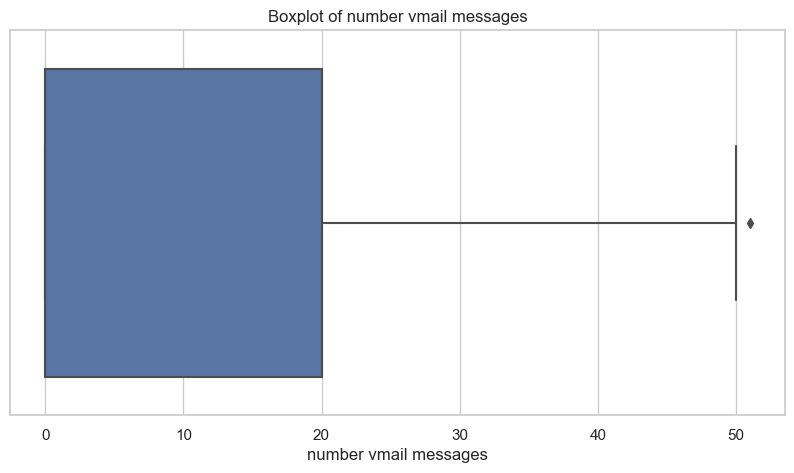

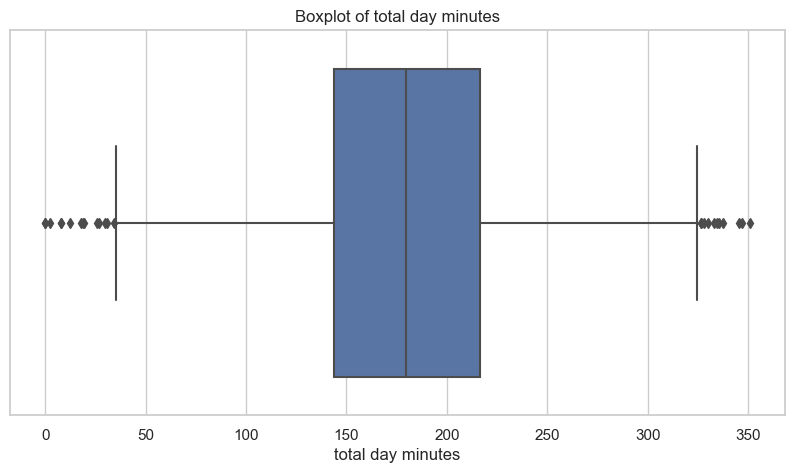

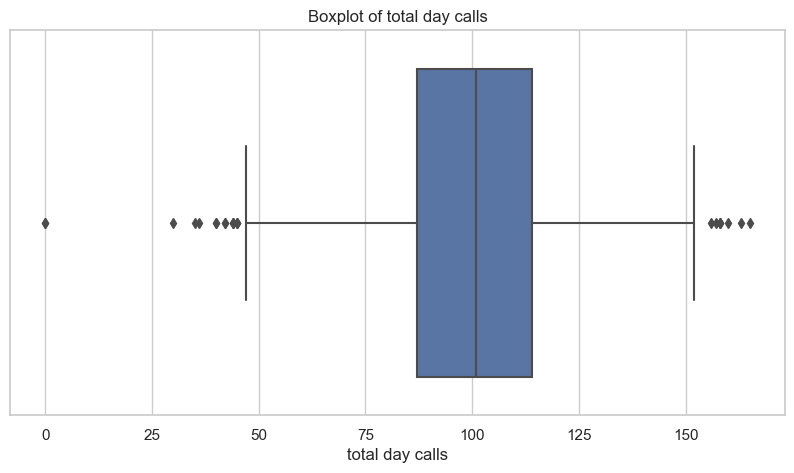

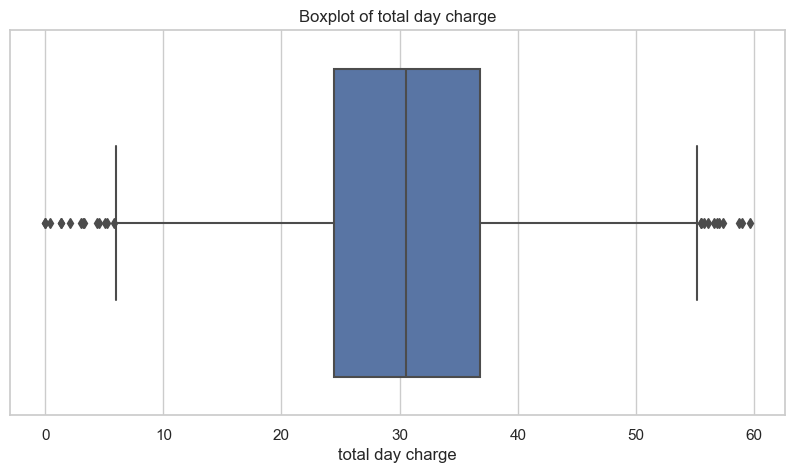

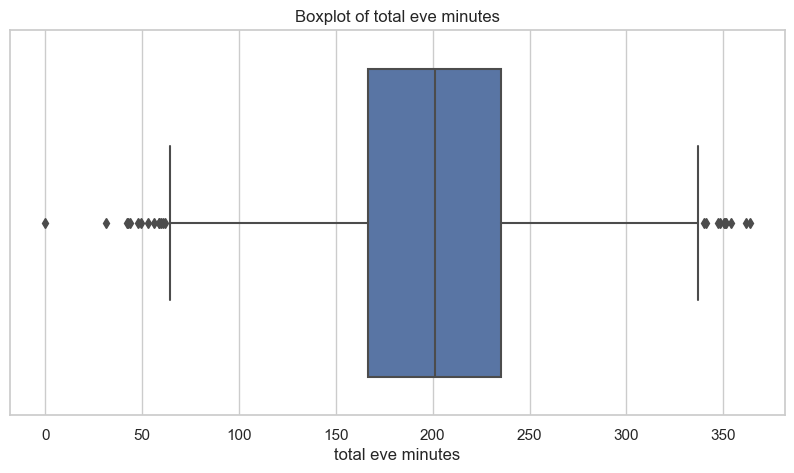

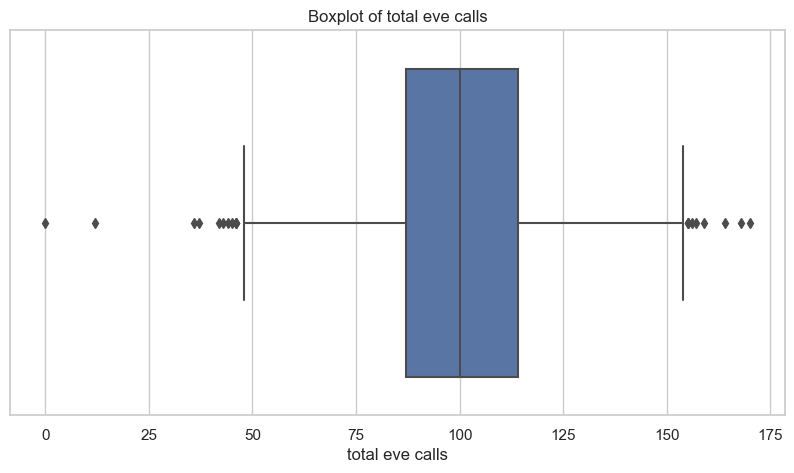

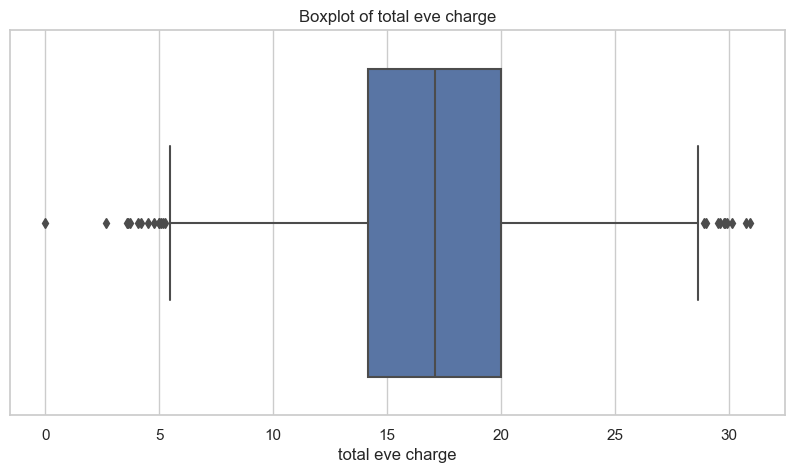

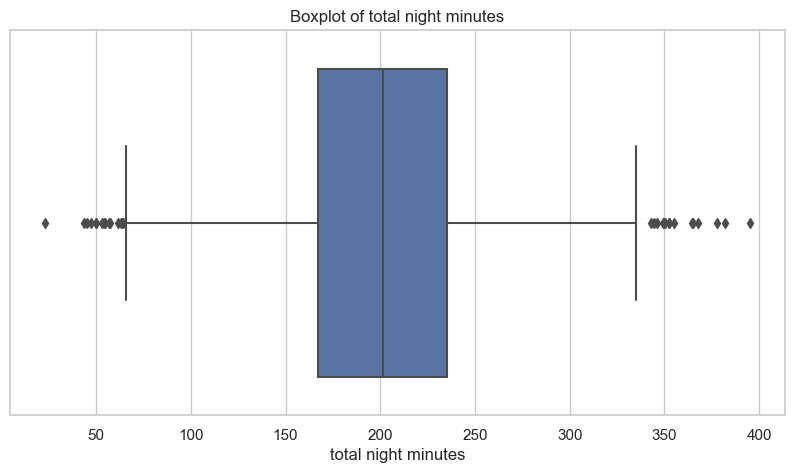

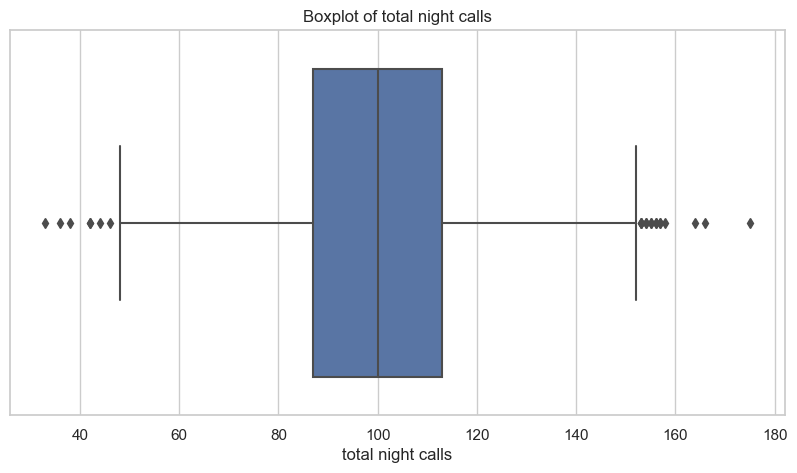

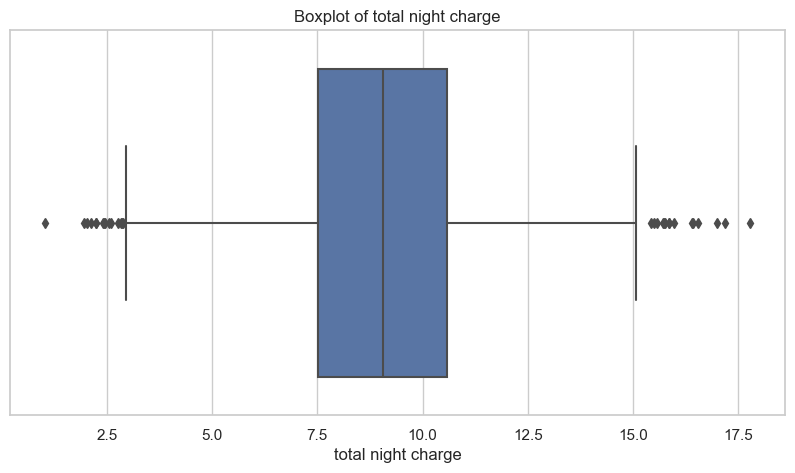

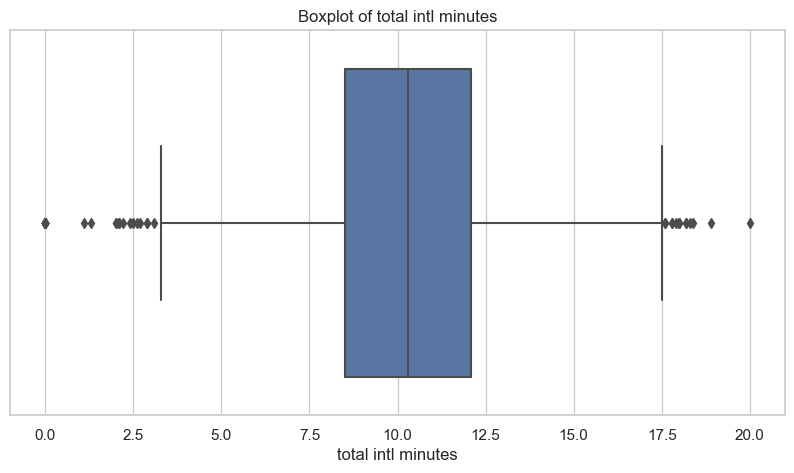

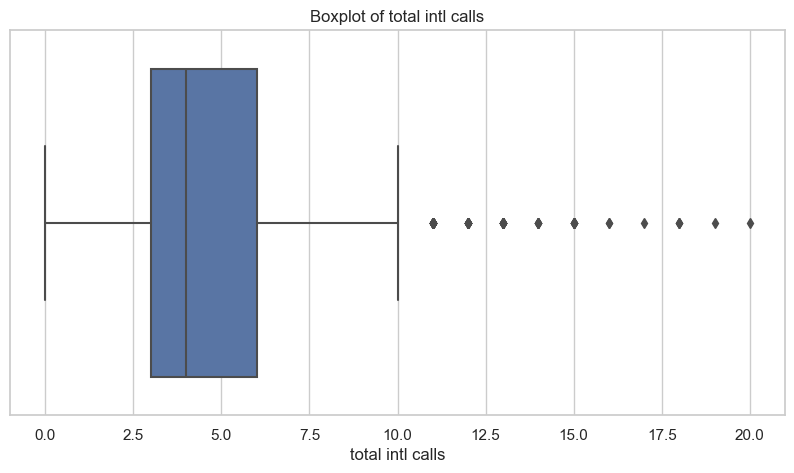

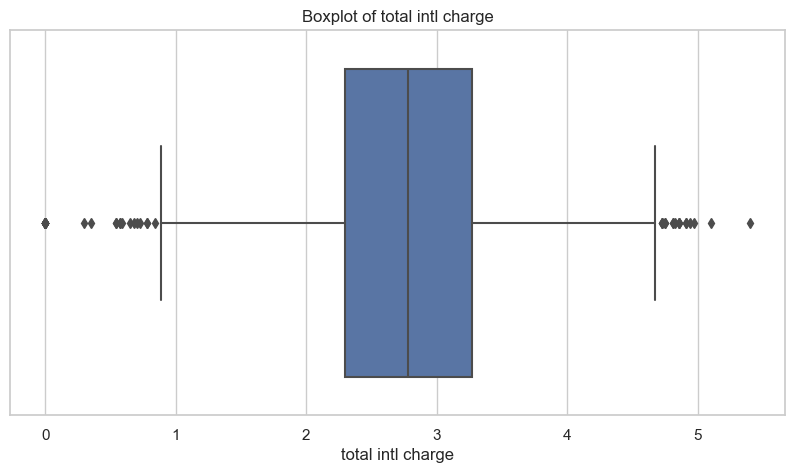

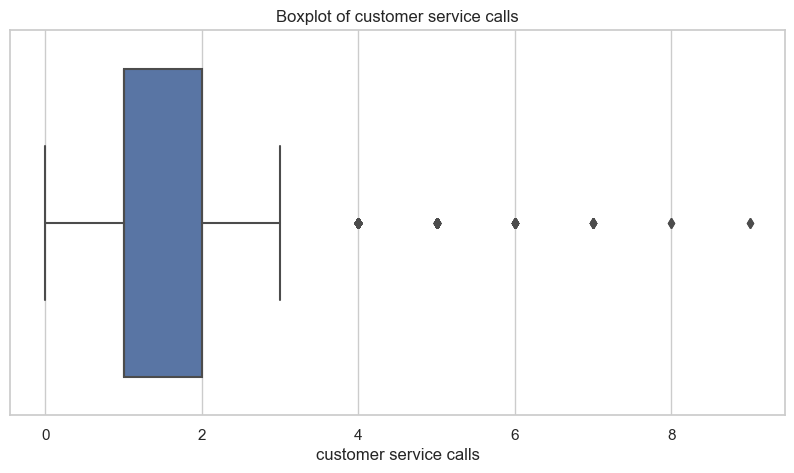

In [31]:

visualizer = BoxplotVisualizer(df[numerical])
visualizer.draw_boxplots()


There's some outliers in our variables which can affect our model we will find techniques of tackling them

### Check distribution of Variable  

I will plot the histograms to check distribution to find out if they are skewed or normal, so if they normal I will do extreme Value analysis, and if skewed I will find the IQR

In [32]:
from scipy.stats import norm, skew

class DistributionAnalyzer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def check_distributions(self):
        sns.set(style="whitegrid")
        
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(self.dataframe[column], kde=True)
            
            # Checking skewness
            skewness = self.dataframe[column].skew()
            
            plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
            
            # Analyze distribution
            if abs(skewness) < 0.5:
                print(f'{column} is approximately normally distributed. Consider extreme value analysis.')
            else:
                print(f'{column} is skewed. Consider using IQR for outlier detection.')
    
    def find_IQR(self, column):
        Q1 = self.dataframe[column].quantile(0.25)
        Q3 = self.dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f'IQR for {column}: {IQR}')
        return IQR


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


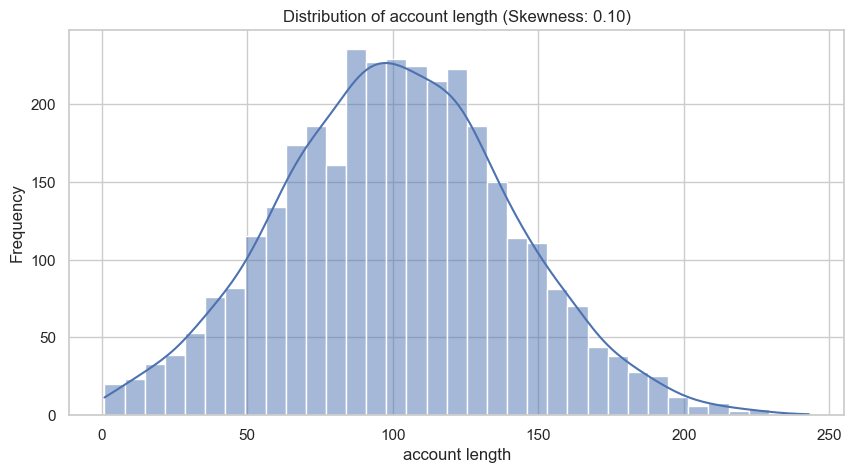

account length is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


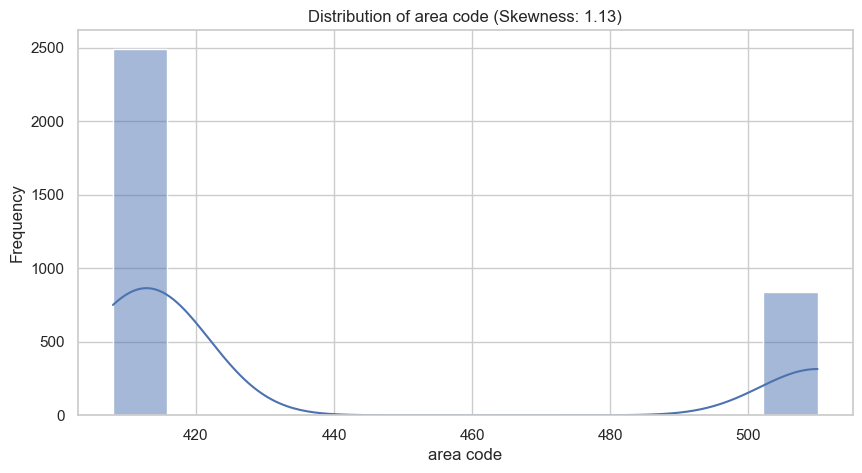

area code is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


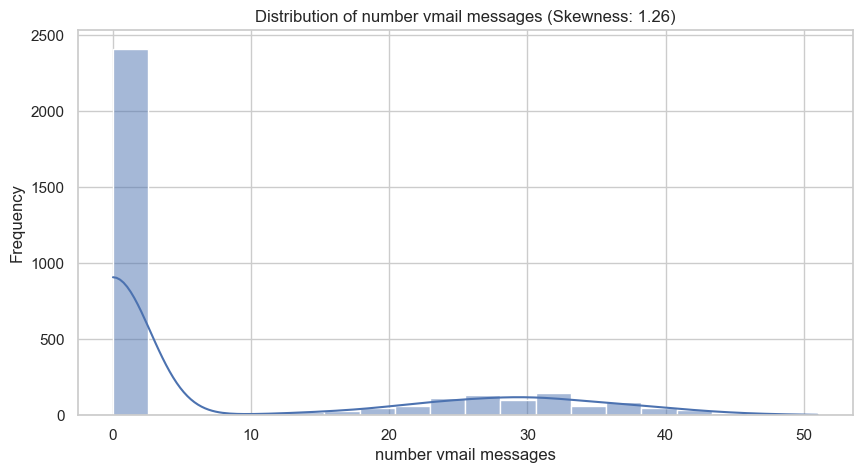

number vmail messages is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


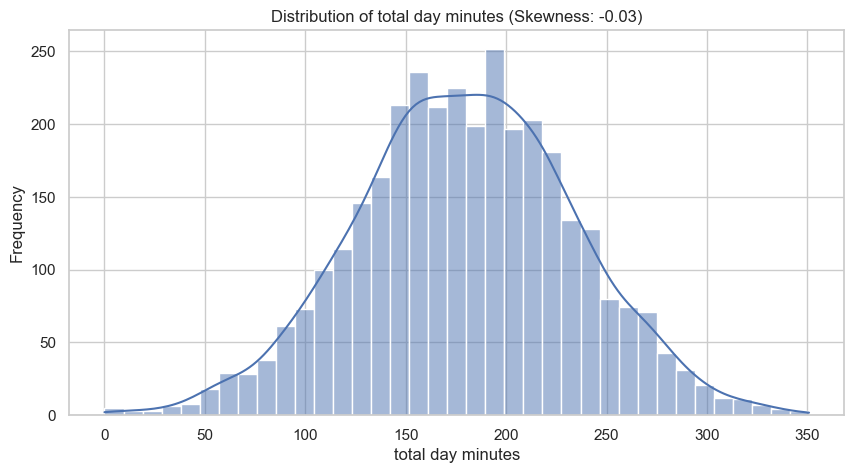

total day minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


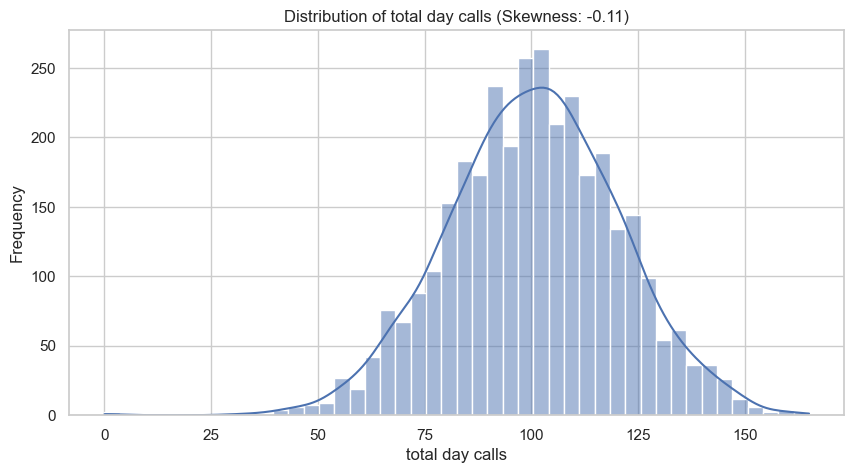

total day calls is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


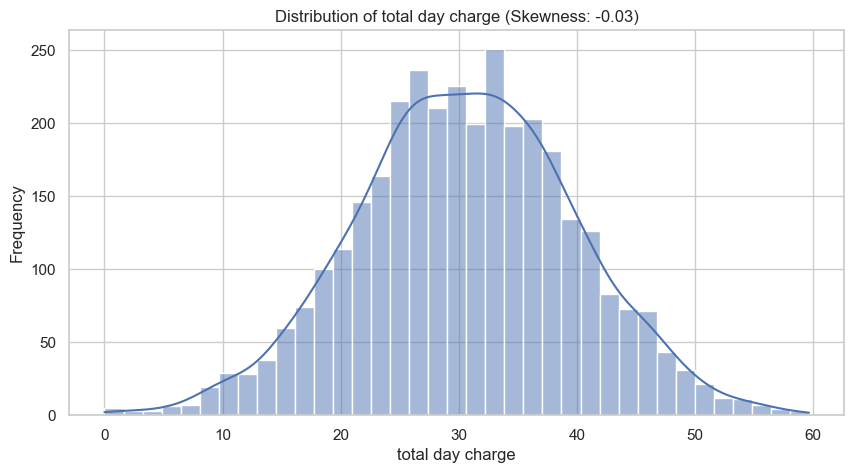

total day charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


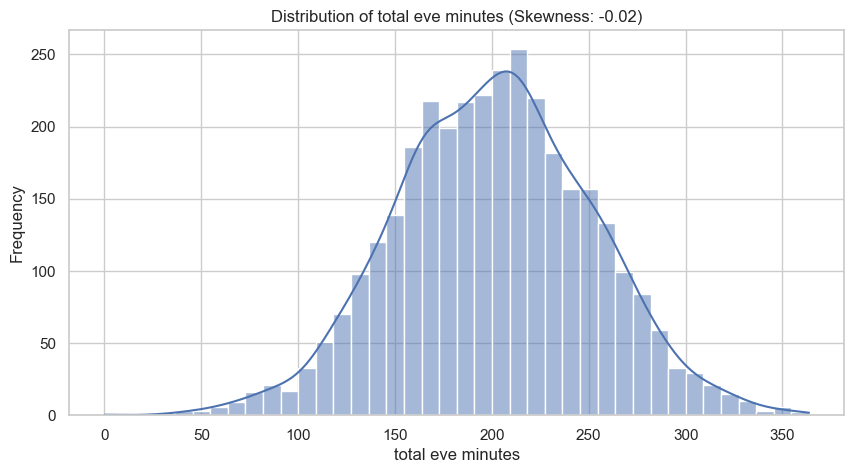

total eve minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


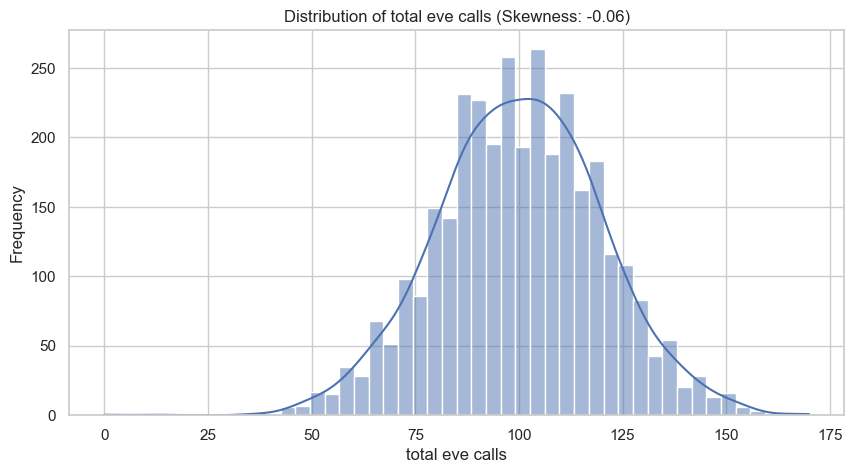

total eve calls is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


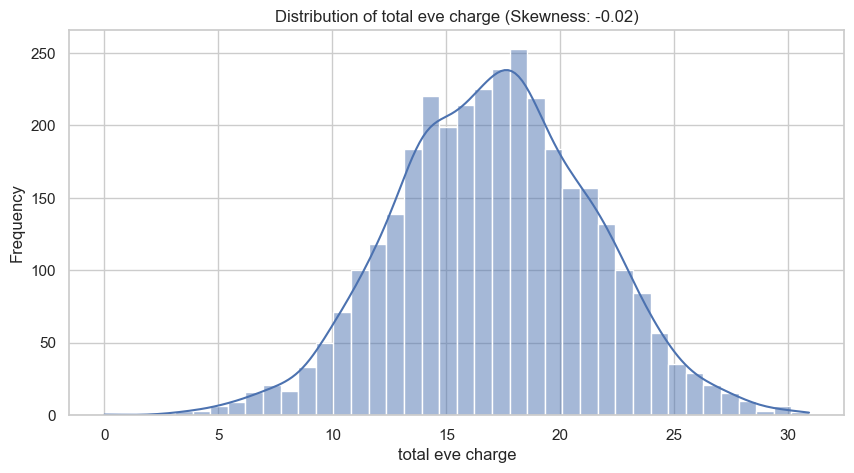

total eve charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


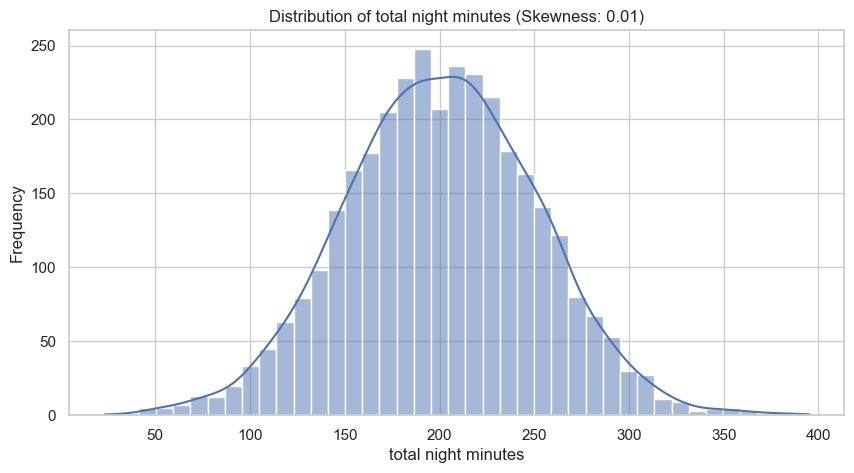

total night minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


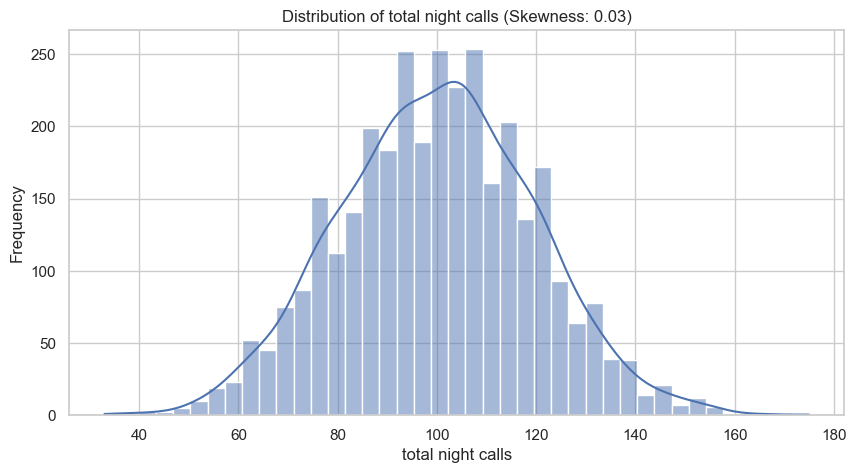

total night calls is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


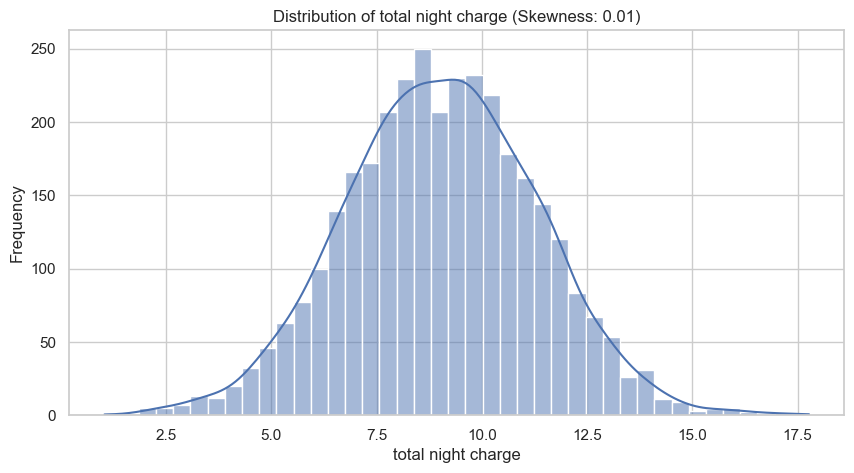

total night charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


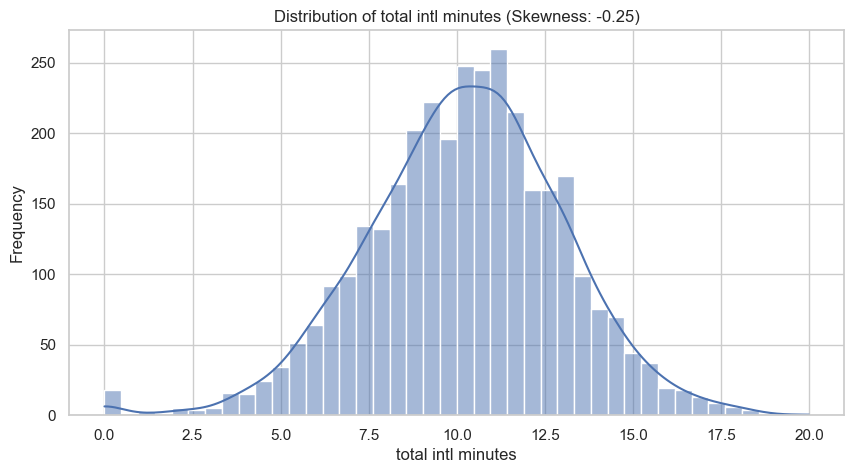

total intl minutes is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


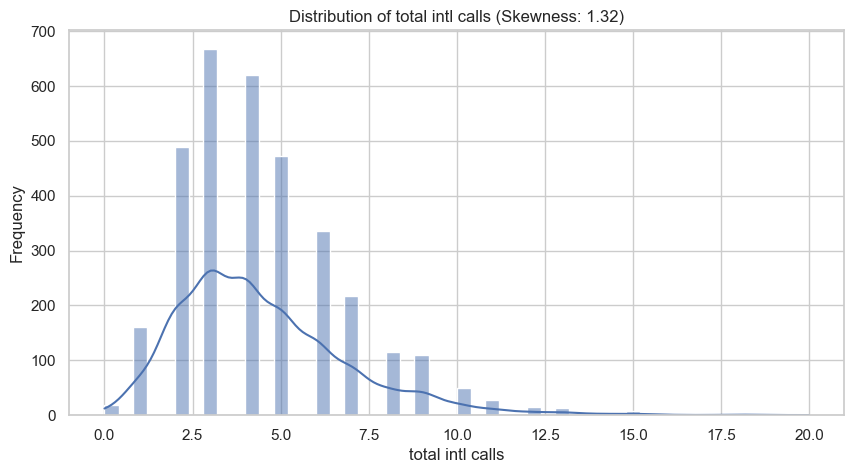

total intl calls is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


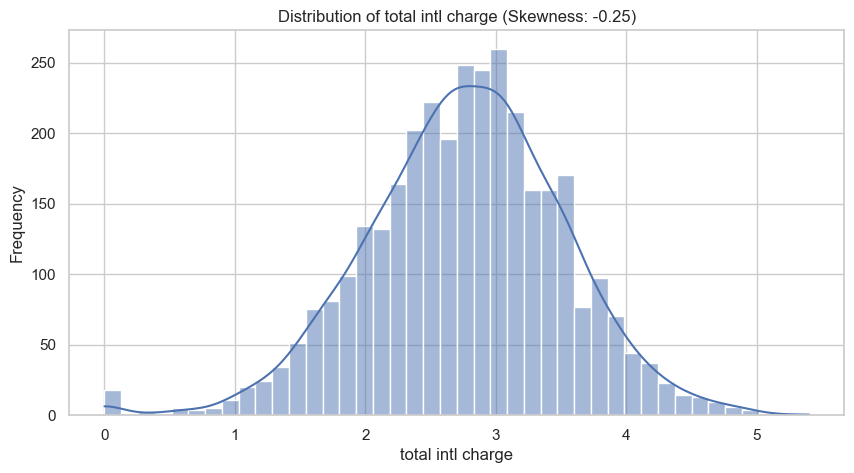

total intl charge is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


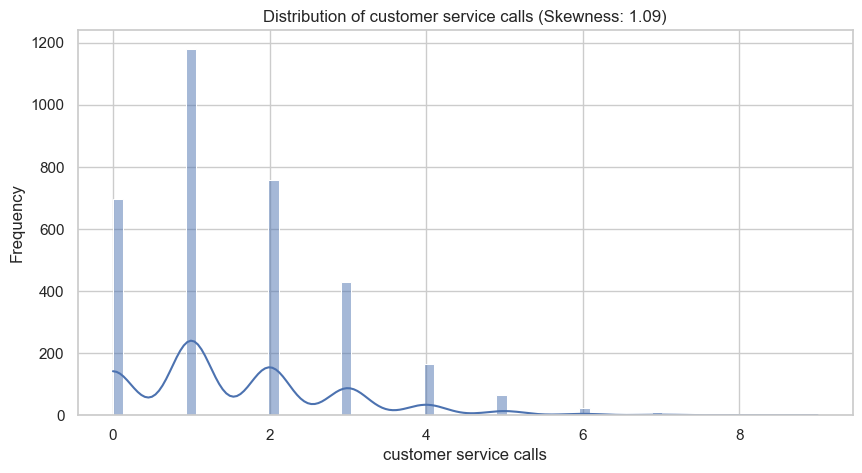

customer service calls is skewed. Consider using IQR for outlier detection.


In [33]:
analyzer = DistributionAnalyzer(df[numerical])
analyzer.check_distributions()

### Handling Normal outliers

In [34]:
from scipy.stats import zscore

def handle_normal_outliers(df, columns):
    for column in columns:
        df[f'{column}_zscore'] = zscore(df[column])
        outliers = df[(df[f'{column}_zscore'] > 3) | (df[f'{column}_zscore'] < -3)]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[(df[f'{column}_zscore'] <= 3) & (df[f'{column}_zscore'] >= -3)]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=df[column].quantile(0.01), upper=df[column].quantile(0.99))

    return df.drop([f'{column}_zscore' for column in columns], axis=1)

normal_columns = [
    'account length', 'total day minutes', 'total day calls', 'total day charge', 
    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 'total intl charge'
]

df = handle_normal_outliers(df, normal_columns)


account length has 7 outliers.
total day minutes has 9 outliers.
total day calls has 9 outliers.
total day charge has 9 outliers.
total eve minutes has 9 outliers.
total eve calls has 7 outliers.
total eve charge has 9 outliers.
total night minutes has 11 outliers.
total night calls has 6 outliers.
total night charge has 11 outliers.
total intl minutes has 22 outliers.
total intl charge has 22 outliers.


In [35]:
from scipy.stats import zscore

class NormalOutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_zscore(self, column, threshold=3):
        z_scores = zscore(self.dataframe[column])
        lower_fence = self.dataframe[column].mean() - threshold * self.dataframe[column].std()
        upper_fence = self.dataframe[column].mean() + threshold * self.dataframe[column].std()
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
normal_outlier_detector = NormalOutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in normal_columns:
    normal_outlier_detector.find_outliers_zscore(column)


account length outliers are values < -18.401511305138754 or > 220.53112426643486
total day minutes outliers are values < 16.372929902636656 or > 343.1772651168652
total day calls outliers are values < 40.22839094245388 or > 160.642896186259
total day charge outliers are values < 2.7840035689315528 or > 58.3406108925146
total eve minutes outliers are values < 48.838814757367714 or > 353.1218813122392
total eve calls outliers are values < 40.34643554931384 or > 159.88218731297238
total eve charge outliers are values < 4.151537424704387 or > 30.01554328336642
total night minutes outliers are values < 49.15049616274547 or > 352.59357824469527
total night calls outliers are values < 41.401882732901264 or > 158.81353880925295
total night charge outliers are values < 2.2117064195131544 or > 15.866943445473344
total intl minutes outliers are values < 1.861775084147677 or > 18.6128123745982
total intl charge outliers are values < 0.5032636201566785 or > 5.02589929613495


### Handling Skewed Outliers

In [36]:
def handle_skewed_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

    return df

skewed_columns = ['area code', 'number vmail messages', 'total intl calls', 'customer service calls']

df = handle_skewed_outliers(df, skewed_columns)


area code has 0 outliers.
number vmail messages has 1 outliers.
total intl calls has 78 outliers.
customer service calls has 267 outliers.


In [37]:
class OutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_iqr(self, column):
        IQR = self.dataframe[column].quantile(0.75) - self.dataframe[column].quantile(0.25)
        lower_fence = self.dataframe[column].quantile(0.25) - (IQR * 3)
        upper_fence = self.dataframe[column].quantile(0.75) + (IQR * 3)
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
outlier_detector = OutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in skewed_columns:
    outlier_detector.find_outliers_iqr(column)


area code outliers are values < 102.0 or > 816.0
number vmail messages outliers are values < -60.0 or > 80.0
total intl calls outliers are values < -6.0 or > 15.0
customer service calls outliers are values < -2.0 or > 5.0


### **Churn Distribution**

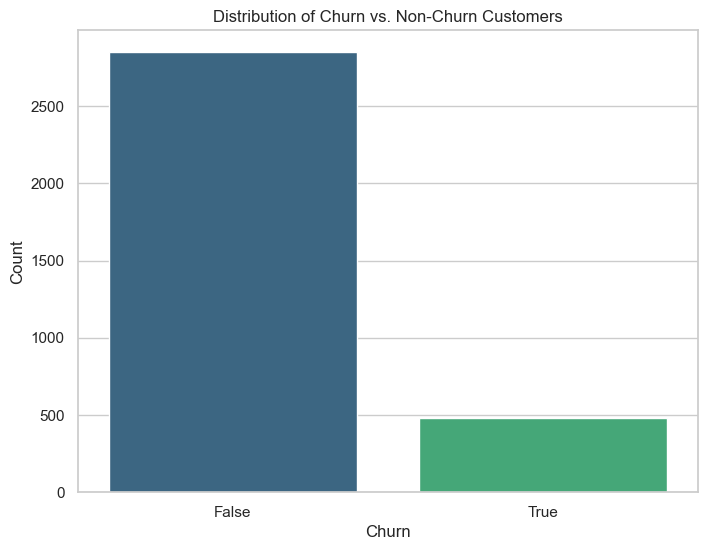

In [38]:

plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Distribution of Churn vs. Non-Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.savefig('images/churn_distribution.png')
plt.show()


### **Correlation Heatmap**

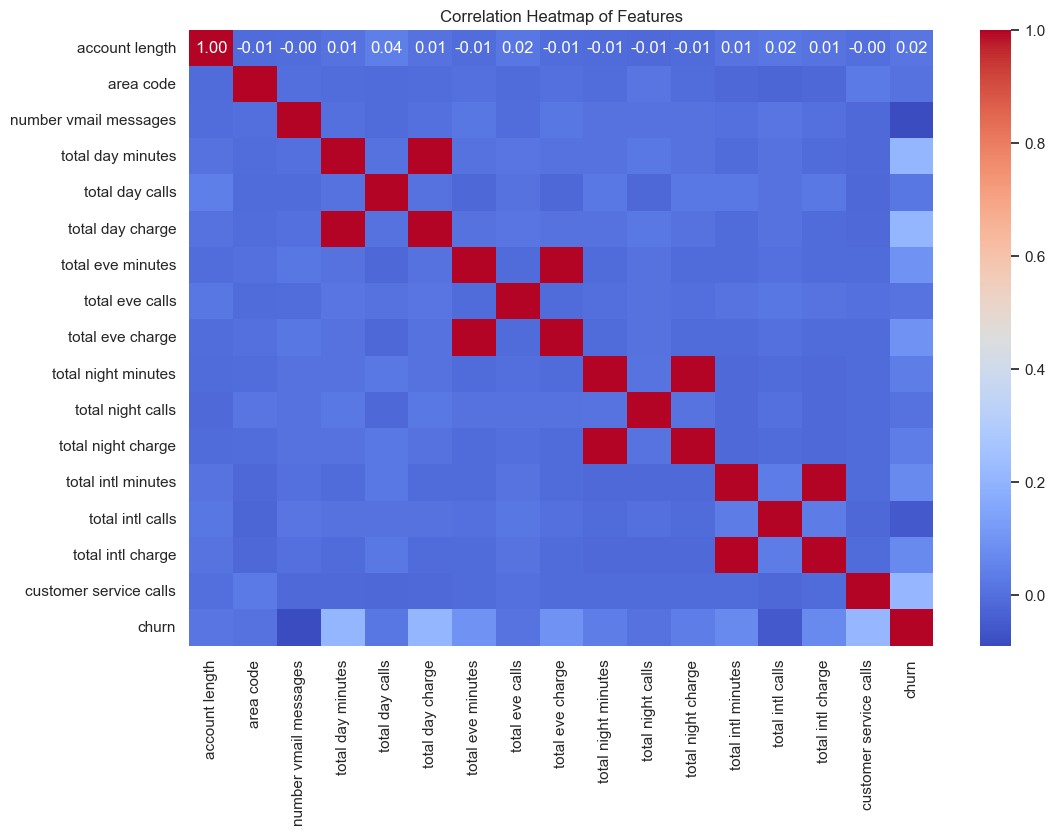

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('images/correlation_heatmap.png')
plt.show()


### Declare Feature Vector and target Variable

In [40]:
df.drop('churn_str',axis=1, inplace=True)

In [41]:
X = df.drop('churn', axis=1)
y = df['churn']


In [42]:
print(y.unique())
y = y.map({True: 1, False: 0})
y = y.replace({'SomeString': 0})  # Replace with appropriate values
y = y.astype(int)



[False  True]


### Split data into separate training and test set

In [43]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2666, 19), (667, 19))

## Feature Engineering

First, I will display the categorical and numerical variables again separately

In [45]:
# check data types in X_train

X_train.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [46]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['state', 'international plan', 'voice mail plan']

In [47]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [48]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

In [49]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

### Handling outliers

In [50]:
# Define the thresholds for outliers
lower_thresholds = {
    'account length': -18.401511305138754,
    'total day minutes': 16.372929902636656,
    'total day calls': 40.22839094245388,
    'total day charge': 2.7840035689315528,
    'total eve minutes': 48.838814757367714,
    'total eve calls': 40.34643554931384,
    'total eve charge': 4.151537424704387,
    'total night minutes': 49.15049616274547,
    'total night calls': 41.401882732901264,
    'total night charge': 2.2117064195131544,
    'total intl minutes': 1.861775084147677,
    'total intl charge': 0.5032636201566785
}

upper_thresholds = {
    'account length': 220.53112426643486,
    'total day minutes': 343.1772651168652,
    'total day calls': 160.642896186259,
    'total day charge': 58.3406108925146,
    'total eve minutes': 353.1218813122392,
    'total eve calls': 159.88218731297238,
    'total eve charge': 30.01554328336642,
    'total night minutes': 352.59357824469527,
    'total night calls': 158.81353880925295,
    'total night charge': 15.866943445473344,
    'total intl minutes': 18.6128123745982,
    'total intl charge': 5.02589929613495
}

# Apply the clipping
for df in [X_train, X_test]:
    for column in lower_thresholds.keys():
        df[column] = df[column].clip(lower=lower_thresholds[column], upper=upper_thresholds[column])

# Check the result
print(X_train.head())


     state  account length  area code international plan voice mail plan  \
1460    MT            80.0        415                 no              no   
2000    PA            28.0        415                 no              no   
666     OR           120.0        415                 no              no   
2962    SD           105.0        415                 no              no   
2773    NJ           134.0        510                 no             yes   

      number vmail messages  total day minutes  total day calls  \
1460                      0              198.1            160.0   
2000                      0              168.2             87.0   
666                       0              252.0            120.0   
2962                      0              251.6             88.0   
2773                     34              247.2            105.0   

      total day charge  total eve minutes  total eve calls  total eve charge  \
1460             33.68              156.7             87.0  

    Handling skewed Outliers

In [51]:
# Function to handle skewed outliers using IQR
def handle_skewed_outliers(df, columns):
    lower_thresholds = {}
    upper_thresholds = {}

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_thresholds[column] = lower_bound
        upper_thresholds[column] = upper_bound

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f'{column} has {len(outliers)} outliers. Outliers are values < {lower_bound} or > {upper_bound}')

    return lower_thresholds, upper_thresholds

# Skewed columns to process
skewed_columns = ['area code', 'number vmail messages', 'total intl calls', 'customer service calls']

# Get the lower and upper thresholds for skewed columns
lower_skewed, upper_skewed = handle_skewed_outliers(X_train, skewed_columns)

# Apply clipping to both training and testing datasets
for df in [X_train, X_test]:
    for column in skewed_columns:
        df[column] = df[column].clip(lower=lower_skewed[column], upper=upper_skewed[column])

# Check the result
print(X_train.head())


area code has 0 outliers. Outliers are values < 255.0 or > 663.0
number vmail messages has 5 outliers. Outliers are values < -28.5 or > 47.5
total intl calls has 62 outliers. Outliers are values < -1.5 or > 10.5
customer service calls has 208 outliers. Outliers are values < -0.5 or > 3.5
     state  account length  area code international plan voice mail plan  \
1460    MT            80.0        415                 no              no   
2000    PA            28.0        415                 no              no   
666     OR           120.0        415                 no              no   
2962    SD           105.0        415                 no              no   
2773    NJ           134.0        510                 no             yes   

      number vmail messages  total day minutes  total day calls  \
1460                    0.0              198.1            160.0   
2000                    0.0              168.2             87.0   
666                     0.0              252.0       

    OneHot encoding my categorical features

In [52]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
X_train.drop('state', axis=1, inplace=True) 
X_test.drop('state', axis=1, inplace=True)
# Initialize the encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit the encoder on the categorical columns of X_train
categorical_cols = ["international plan", "voice mail plan"]
ohe.fit(X_train[categorical_cols])

# Transform the categorical columns in both training and test data
X_train_encoded = ohe.transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

# Convert the encoded features to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from X_train and X_test
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

# Concatenate the encoded features with the remaining features
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Check the result
X_train.head()


c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,80.0,415,0.0,198.1,160.0,33.68,156.7,87.0,13.32,182.1,76.0,8.19,9.3,3.0,2.51,3.0,1.0,0.0,1.0,0.0
1,28.0,415,0.0,168.2,87.0,28.59,161.7,92.0,13.74,192.4,112.0,8.66,10.1,3.0,2.73,3.0,1.0,0.0,1.0,0.0
2,120.0,415,0.0,252.0,120.0,42.84,150.2,106.0,12.77,151.8,96.0,6.83,9.6,1.0,2.59,2.0,1.0,0.0,1.0,0.0
3,105.0,415,0.0,251.6,88.0,42.77,175.1,103.0,14.88,184.4,112.0,8.30,5.4,5.0,1.46,1.0,1.0,0.0,1.0,0.0
4,134.0,510,34.0,247.2,105.0,42.02,225.5,133.0,19.17,186.3,76.0,8.38,6.1,5.0,1.65,2.0,1.0,0.0,0.0,1.0


In [53]:
X_train[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.341030,437.351838,7.995311,179.973798,100.440810,30.596083,201.603623,100.107289,17.136517,201.179147,100.055826,9.053137,10.250605,4.426482,2.768160,1.467367
std,39.869790,42.488511,13.562602,54.165315,20.035678,9.208086,50.910233,19.895243,4.327401,50.406041,19.767846,2.268319,2.775876,2.263388,0.749458,1.107312
min,1.000000,408.000000,0.000000,16.372930,40.228391,2.784004,48.838815,40.346436,4.151537,49.150496,41.401883,2.211706,1.861775,0.000000,0.503264,0.000000
25%,73.000000,408.000000,0.000000,144.650000,87.000000,24.590000,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.400000,100.000000,30.500000,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.000000,114.000000,36.720000,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,220.531124,510.000000,47.500000,343.177265,160.642896,58.340611,353.121881,159.882187,30.015543,352.593578,158.813539,15.866943,18.612812,10.500000,5.025899,3.500000


outliers are now capped now lets proceed to feature scaling

### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the scaled data
print(X_train_scaled.head())


   account length  area code  number vmail messages  total day minutes  \
0       -0.510282  -0.526167              -0.589622           0.334709   
1       -1.814773  -0.526167              -0.589622          -0.217409   
2        0.493172  -0.526167              -0.589622           1.329997   
3        0.116877  -0.526167              -0.589622           1.322611   
4        0.844381   1.710152               1.917742           1.241363   

   total day calls  total day charge  total eve minutes  total eve calls  \
0         2.973214          0.334977          -0.882181        -0.658939   
1        -0.670970         -0.217902          -0.783951        -0.407575   
2         0.976401          1.329941          -1.009881         0.296243   
3        -0.621049          1.322338          -0.520693         0.145424   
4         0.227596          1.240872           0.469471         1.653605   

   total eve charge  total night minutes  total night calls  \
0         -0.882107            -0.3

### **Baseline Model: Logistic Regression Model**

### Model Training

In [55]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

### Predict results

In [56]:
y_pred_test = logreg.predict(X_test)


### Check Accuracy Score

In [57]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8785607196401799


    An accuracy of 87.26% is a strong result, indicating that the model correctly classifies about 87% of the test data. 

### Compare the train-set and test-set accuracy

In [58]:
y_pred_train = logreg.predict(X_train)

In [59]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8620


### Check for overfitting and underfitting

In [60]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8620
Test set score: 0.8786


    The training set accuracy is 0.8597 while the test set accuracy is 0.8726. we have used the default value C=1 which provides an accuracy of 87 on the test data and 86 on the training set which is coparable, I will increase C and fit a more flexible model and check the score

In [61]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [62]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8646
Test set score: 0.8756


    C=100 results in a lower test set accuracy and the train test set remains the same lemme try with C=0.01 which is more regularized model than the default.

In [63]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [64]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8582
Test set score: 0.8786


    if we use C=0.01 the training score is slightly lower than the C= 100, but the test score is the highest among the tested configurations. This suggests that increasing regularization(lower C) helps generalize the model better to unseen data by preventing it from fitting noise in the training set. Testing the perfomance of the training set with C= 0.01 has a slightly lower training Accuracy which suggests its slightly underfitting compared to C=100, while for the test set it performs better than C=100 indicating better generalization. This suggests that simpler model(higher regularization) is better in suited for this problem.

### Compare model accuracy and null accuracy

In [65]:
y_test.value_counts()

churn
0    579
1     88
Name: count, dtype: int64

    we can see that the occurences of most frequent class is 579. So, we can calculate null accuracy by diving 579 by total number of occurences.

In [66]:
# check null accuracy score

null_accuracy = (579/(579+88))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8681


    The model is better than the baseline, this suggests that while the model is functional there's potential for enhancement. So we proceed to to evaluate additional metrics.

### Evaluate Additional Metrics: Confusion Matrix, Precision, Recall and F1-score

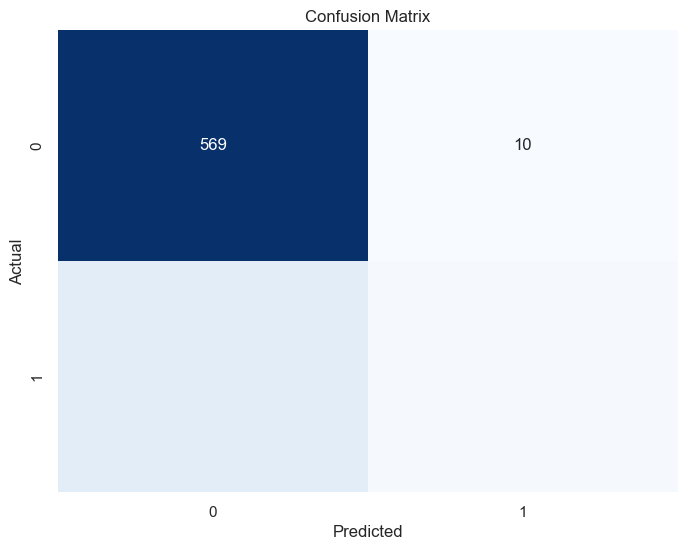

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       579
           1       0.63      0.19      0.30        88

    accuracy                           0.88       667
   macro avg       0.76      0.59      0.61       667
weighted avg       0.85      0.88      0.85       667



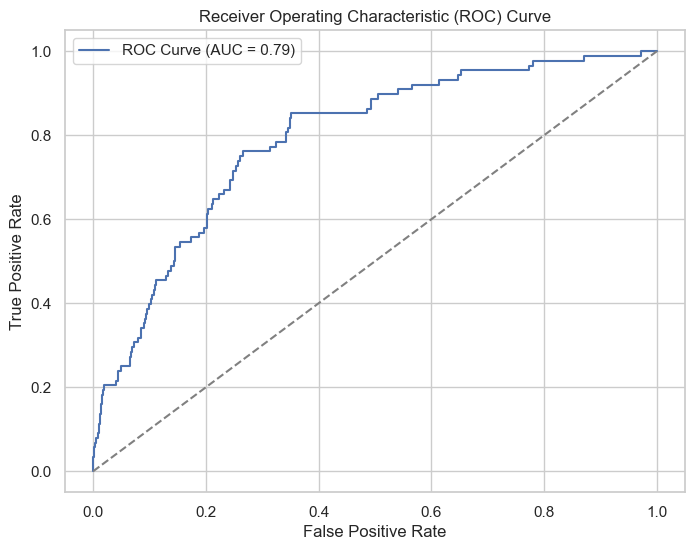

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve 


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# ROC Curve and AUC
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [68]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[569  10]
 [ 71  17]]

True Positives(TP) =  569

True Negatives(TN) =  17

False Positives(FP) =  10

False Negatives(FN) =  71


1. Confusion Matrix Analysis:  
`True Positives (TP)`: 563 — The model correctly predicted 563 customers who did not churn.  
`True Negatives (TN)`: 19 — The model correctly predicted 19 customers who churned.  
`False Positives (FP)`: 16 — The model incorrectly predicted 16 customers who did not churn when they actually did.  
`False Negatives (FN)`: 69 — The model incorrectly predicted 69 customers who churned when they did not.  

2. Classification Report Analysis:  

`Precision`:

>> For class 0 (non-churn): 0.89  
>> For class 1 (churn): 0.54   

Precision indicates how many of the positive predictions were actually correct. The precision for class 1 is quite low, suggesting a high rate of false positives when predicting churn.  

`Recall (Sensitivity)`:

For class 0: 0.97  
For class 1: 0.22  

Recall indicates how many of the actual positives were captured by the model. The low recall for class 1 suggests that the model is missing many actual churn cases (high false negatives).  

`F1-Score`:  

For class 0: 0.93  
For class 1: 0.31  

F1-score is a combination of precision and recall, providing a more balanced measure of the model's performance. The F1-score for class 1 is quite low, suggesting a high rate of false positives when predicting churn.
3. Accuracy Analysis:

The accuracy score is 0.87, indicating that the model correctly predicts 87% of the cases. However, due to class imbalance, this metric is less informative.    

The F1-score balances precision and recall, indicating that the model is struggling to effectively detect the churn class (class 1).  
Accuracy: 0.87 — Overall, the model correctly predicts 87% of the cases. However, due to class imbalance, this metric is less informative on its own.   

`Macro Avg and Weighted Avg:`  

The macro average highlights an imbalance between classes, showing that while non-churn predictions are strong, churn predictions are poor. The weighted average accounts for the class imbalance, showing a better overall performance but still reflective of the weaker performance on the minority class.   

4. ROC Curve and AUC Analysis:  

The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity).  

`AUC (Area Under the Curve)`: 0.81 — This score reflects good discriminative ability, indicating the model has a reasonable ability to distinguish between churn and non-churn classes. However, there is still room for improvement, especially given the high false negatives.  

This model can be further improved by addressing the class imbalance problem, which can be addressed by using techniques like oversampling or undersampling, or by using more advanced models like Decision Trees or Random Forest. Additionally, hyperparameter tuning can be performed to improve the model's performance further. The model's performance can be further evaluated using additional metrics such as precision-recall curves or lift charts to gain a more nuanced understanding of the model's performance.  

### Check for Class Imbalance

In [69]:
# Checking class distribution
print("Class Distribution in y_test:")
print(y_test.value_counts(normalize=True))




Class Distribution in y_test:
churn
0    0.868066
1    0.131934
Name: proportion, dtype: float64


    Model Bias: The model is biased towards the majority class (non-churn). This bias is evident from the high precision and recall for class 0 and the low values for class 1. The model is performing well at predicting non-churn cases but struggling to identify churn cases effectively.

### Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                                    param_grid_log_reg, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search_log_reg.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
best_log_reg = grid_search_log_reg.best_estimator_

# Predict and evaluate
y_pred_best_log_reg = best_log_reg.predict(X_test)
print("Optimized Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log_reg))
print("AUC Score:", roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1]))


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       579
           1       0.29      0.75      0.42        88

    accuracy                           0.73       667
   macro avg       0.62      0.74      0.62       667
weighted avg       0.86      0.73      0.77       667

Confusion Matrix:
[[418 161]
 [ 22  66]]
AUC Score: 0.7938648139425342


### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {logreg_cv_scores.mean():.4f} ± {logreg_cv_scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.8578 ± 0.0083


## Feature Importance

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: account length, Score: 0.00035
Feature: area code, Score: -0.00607
Feature: number vmail messages, Score: -0.02400
Feature: total day minutes, Score: 0.01086
Feature: total day calls, Score: -0.00494
Feature: total day charge, Score: 0.00191
Feature: total eve minutes, Score: 0.00340
Feature: total eve calls, Score: -0.00480
Feature: total eve charge, Score: 0.00032
Feature: total night minutes, Score: 0.00072
Feature: total night calls, Score: -0.00492
Feature: total night charge, Score: 0.00001
Feature: total intl minutes, Score: -0.02279
Feature: total intl calls, Score: -0.18232
Feature: total intl charge, Score: -0.00600
Feature: customer service calls, Score: 0.47540
Feature: international plan_no, Score: -0.27902
Feature: international plan_yes, Score: 0.24841
Feature: voice mail plan_no, Score: -0.00784
Feature: voice mail plan_yes, Score: -0.02277


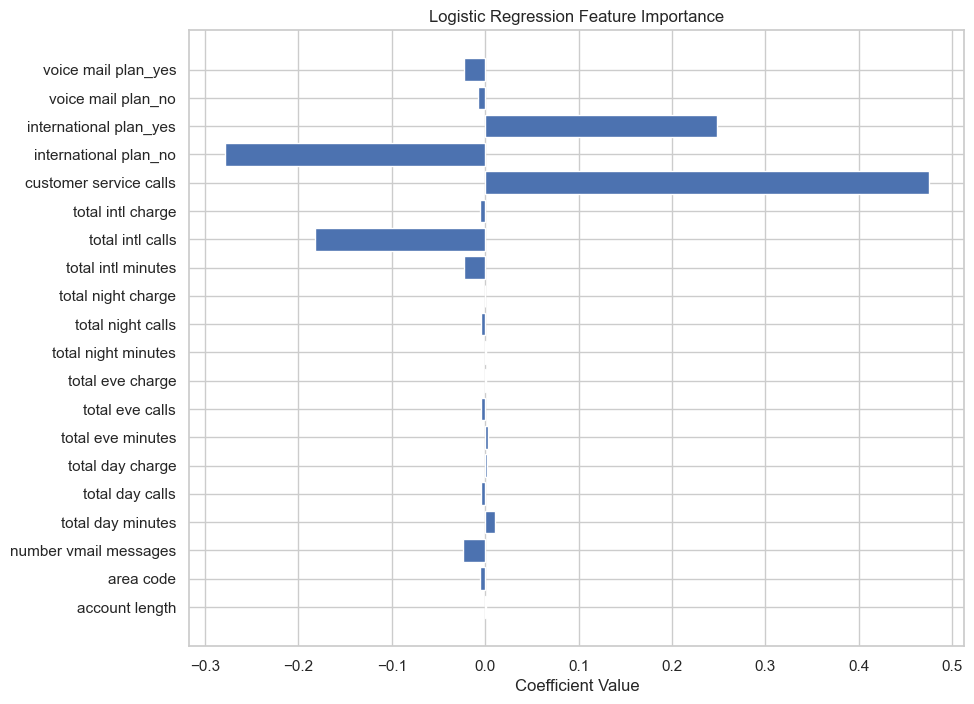

In [72]:
#initianting the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get feature importance based on coefficients
importance = model.coef_[0]

# Summarize the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns, importance)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()


    Based on the plot above it shows the coefficient of the features in logistic regression model for predicting churn. 
**1. Customer Service Calls:**

    Coefficient: ~0.44
    
    This is the most influential feature in the model, with a positive coefficient. It indicates that as the number of customer service calls increases, the likelihood of churn also increases significantly. This suggests that customers who frequently contact customer service might be more likely to churn, potentially due to unresolved issues or dissatisfaction.

**2. International Plan (Yes/No):**

    Coefficient: Yes ~0.18, No ~-0.20

    Customers with an international plan have a higher chance of churning (positive coefficient). Conversely, those without an international plan are less likely to churn (negative coefficient). This could imply dissatisfaction with the international plan or that it's not meeting customer expectations.

**3. Total International Calls:**

    Coefficient: ~-0.087

    This feature has a negative coefficient, indicating that customers who make more international calls are less likely to churn. This might suggest that customers who frequently use international calling are more engaged or satisfied with the service.

**4. Other Features:**

    Features like number vmail messages, total day minutes, and area code have smaller coefficients, indicating a lesser influence on churn. Some of these coefficients are close to zero, suggesting that these features may not be as impactful.



### **Build  More Complex Models: Decision Tree & Random Forest:**

### Decision Tree model

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dec_tree = decision_tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))
print("AUC Score:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       579
           1       0.61      0.81      0.69        88

    accuracy                           0.91       667
   macro avg       0.79      0.86      0.82       667
weighted avg       0.92      0.91      0.91       667

Confusion Matrix:
[[533  46]
 [ 17  71]]
AUC Score: 0.8636854294237712


    * The Decision Tree model performs significantly better in identifying churn customers (class 1) due to its higher recall and F1-score, which is critical for minimizing customer churn.  
    * While Logistic Regression has slightly better recall for non-churn (class 0), the Decision Tree's overall balance between precision and recall, along with a higher AUC score, makes it a more suitable model for this problem.      
    * However, the Decision Tree does have a higher number of false positives (50 compared to 16), indicating that it might be slightly overfitting or too aggressive in predicting churn.

### Roc Curve

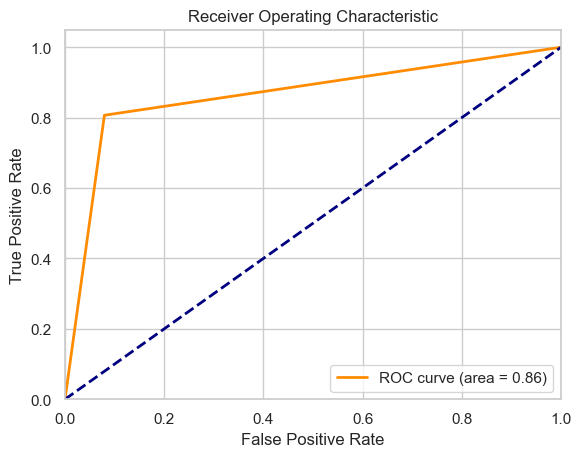

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dec_tree)
auc_score = roc_auc_score(y_test, y_pred_dec_tree)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

    An AUC of 0.86 indicates that the decision tree model has good discriminatory power. Specifically, there's an 86% chance that the model will correctly distinguish between a randomly chosen positive instance (e.g., a customer who churns) and a randomly chosen negative instance (e.g., a customer who does not churn).


### Confusion Matrix

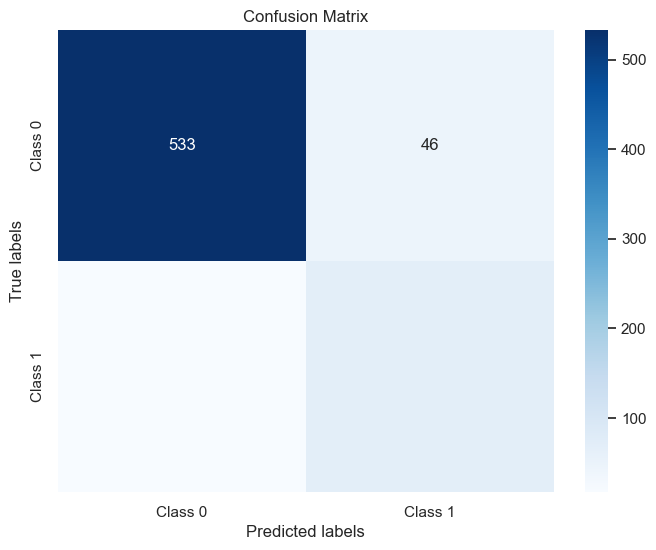

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dec_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter Tuning Desision tree

In [76]:
# Define parameter grid for Decision Tree
param_grid_dec_tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dec_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                                    param_grid_dec_tree, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search_dec_tree.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Decision Tree:", grid_search_dec_tree.best_params_)
best_dec_tree = grid_search_dec_tree.best_estimator_

# Predict and evaluate
y_pred_best_dec_tree = best_dec_tree.predict(X_test)
print("Optimized Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_dec_tree))
print("AUC Score:", roc_auc_score(y_test, best_dec_tree.predict_proba(X_test)[:, 1]))


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       579
           1       0.52      0.88      0.66        88

    accuracy                           0.88       667
   macro avg       0.75      0.88      0.79       667
weighted avg       0.92      0.88      0.89       667

Confusion Matrix:
[[509  70]
 [ 11  77]]
AUC Score: 0.9175498508400062


    Significant Improvement in Detecting Churn: The tuned model has substantially enhanced its ability to detect churn cases, particularly with a high recall of 88%, which is crucial for the business objective of reducing customer loss.
    Balanced Performance: The improved F1-score and AUC score demonstrate that the Decision Tree is now more balanced in predicting both classes, making it a reliable model for real-world application.

### Visualizing Decision Tree

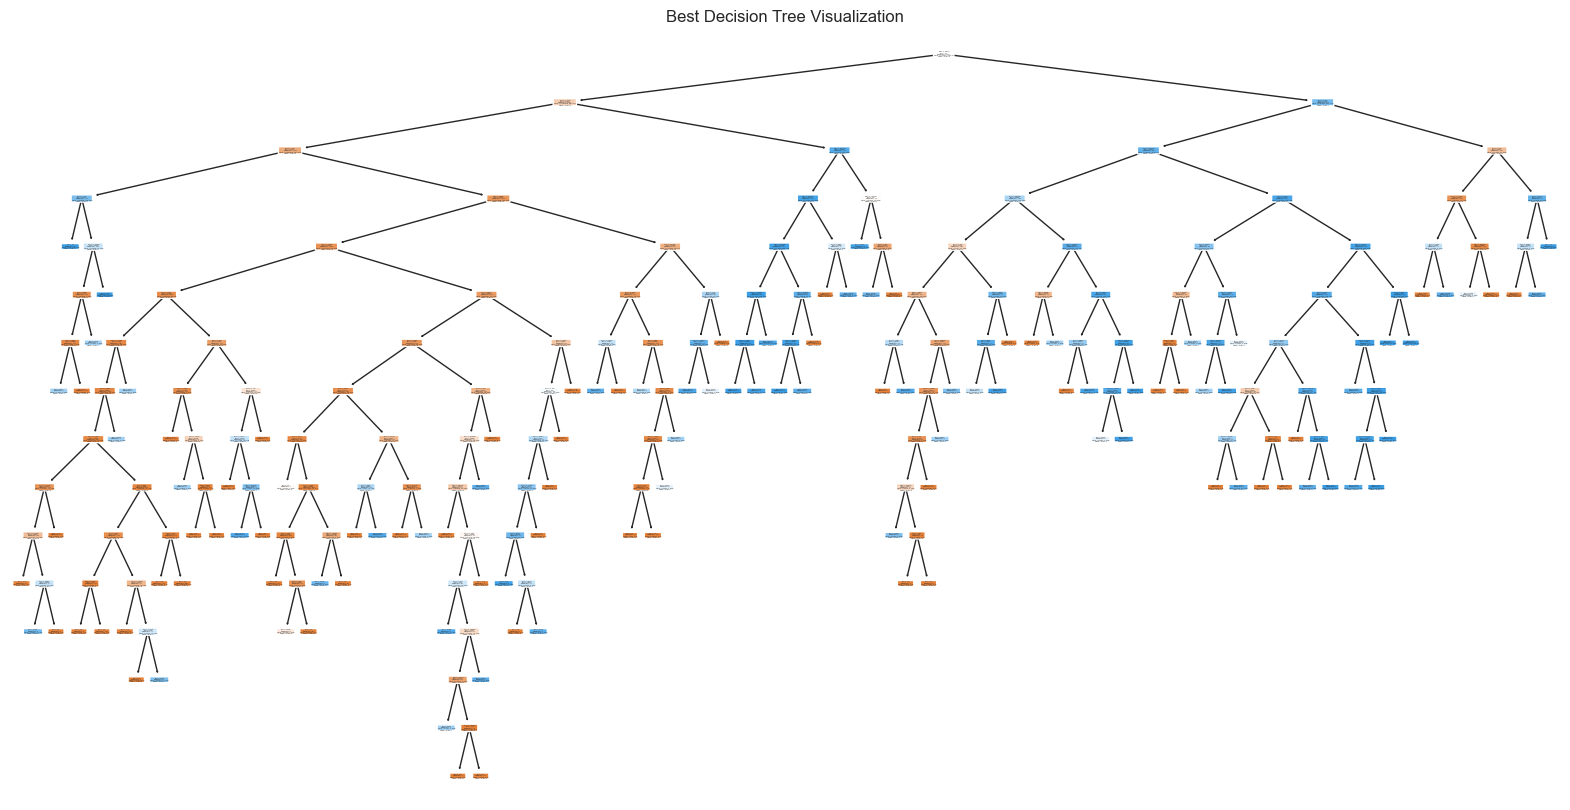

In [77]:
# Plot the Decision Tree without feature names
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dec_tree, filled=True, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Best Decision Tree Visualization')
plt.show()

    Feature Importance For Decision Tree

Feature: account length, Score: 0.02794
Feature: area code, Score: 0.00774
Feature: number vmail messages, Score: 0.04905
Feature: total day minutes, Score: 0.21470
Feature: total day calls, Score: 0.02857
Feature: total day charge, Score: 0.06320
Feature: total eve minutes, Score: 0.07926
Feature: total eve calls, Score: 0.01525
Feature: total eve charge, Score: 0.06526
Feature: total night minutes, Score: 0.02397
Feature: total night calls, Score: 0.02900
Feature: total night charge, Score: 0.02660
Feature: total intl minutes, Score: 0.01358
Feature: total intl calls, Score: 0.06289
Feature: total intl charge, Score: 0.07646
Feature: customer service calls, Score: 0.11797
Feature: international plan_no, Score: 0.00766
Feature: international plan_yes, Score: 0.06749
Feature: voice mail plan_no, Score: 0.02142
Feature: voice mail plan_yes, Score: 0.00198


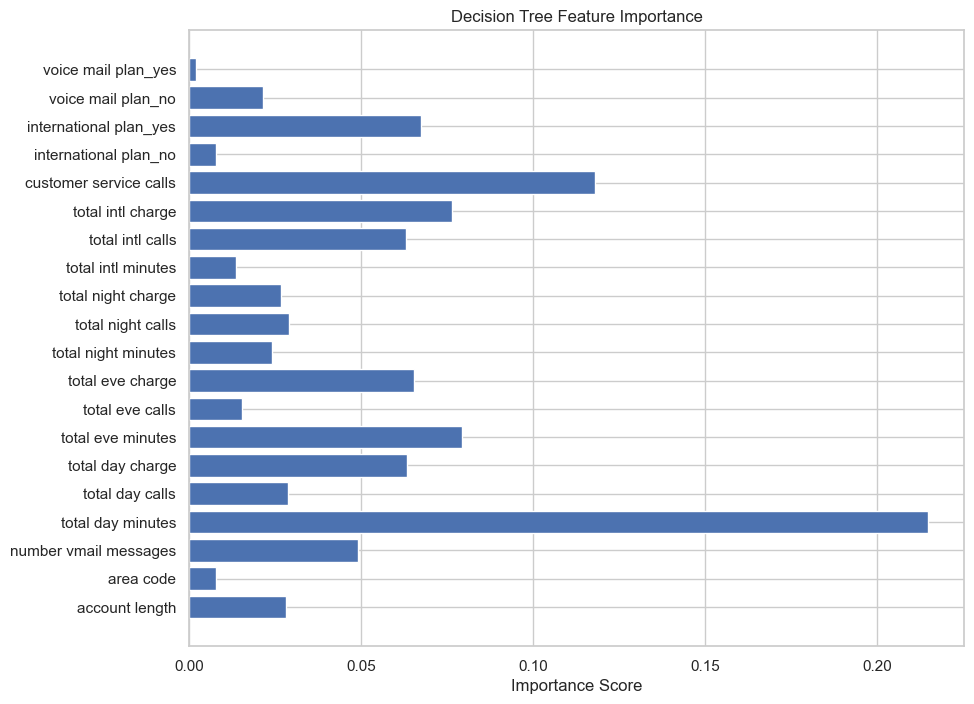

In [78]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Summarize the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns, importance)
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importance')
plt.show()


    The barplot visualizes the importance scores of various features in the decision tree model. we intrepret this here below :

**Total Day Minutes:**

    Importance Score: ~0.24

    This is the most influential feature in the decision tree model, with a significantly higher importance score compared to others. It suggests that the total number of minutes a customer spends on daytime calls is a critical factor in predicting churn. SyriaTel might want to focus on understanding how this metric correlates with customer satisfaction or dissatisfaction.

**Customer Service Calls:**

    Importance Score: ~0.11

    Similar to the logistic regression model, the number of customer service calls remains a significant predictor of churn. It further reinforces the importance of customer service quality. A high number of calls to customer service may indicate issues that, if unresolved, lead to churn.

**Total Evening Charge:**

    Importance Score: ~0.09

    The charges accumulated during evening calls are another notable feature. This could indicate that evening call costs are a concern for customers, potentially contributing to churn.

**Total International Charge and Calls:**

    Importance Score: ~0.07 and ~0.06, respectively

    Charges and calls for international services also play a role in predicting churn. This suggests that customers who frequently use international services might have specific needs or expectations that, if unmet, could drive them to leave.

**Total Day Calls:**

    Importance Score: ~0.03

    This feature also contributes, though less so than total day minutes. It suggests that not just the duration but the frequency of daytime calls may influence customer behavior. 

**Other Features:**

    Features like number vmail messages, total eve minutes, and total intl minutes have smaller importance scores, indicating they play a role but are not as critical in the decision tree's predictions.

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       579
           1       0.88      0.80      0.83        88

    accuracy                           0.96       667
   macro avg       0.92      0.89      0.90       667
weighted avg       0.96      0.96      0.96       667

Confusion Matrix:
[[569  10]
 [ 18  70]]
AUC Score: 0.9202288428324698


### Model Comparison

In [80]:
# Function to compare models
def compare_models(model1_name, y_test, model1_pred, model1_prob, model2_name, model2_pred, model2_prob):
    print(f"Comparison of {model1_name} and {model2_name}:\n")
    
    # Metrics for Model 1
    print(f"{model1_name} Classification Report:")
    print(classification_report(y_test, model1_pred))
    
    print(f"{model1_name} Confusion Matrix:")
    print(confusion_matrix(y_test, model1_pred))
    
    print(f"{model1_name} AUC Score: {roc_auc_score(y_test, model1_prob)}\n")
    
    # Metrics for Model 2
    print(f"{model2_name} Classification Report:")
    print(classification_report(y_test, model2_pred))
    
    print(f"{model2_name} Confusion Matrix:")
    print(confusion_matrix(y_test, model2_pred))
    
    print(f"{model2_name} AUC Score: {roc_auc_score(y_test, model2_prob)}\n")
dt_probabilities = decision_tree.predict_proba(X_test)[:, 1]
rf_probabilities = random_forest.predict_proba(X_test)[:, 1]
# Comparing Decision Tree and Random Forest
compare_models(
    "Decision Tree", y_test, y_pred_dec_tree, dt_probabilities, 
    "Random Forest", y_pred_rf, rf_probabilities
)


Comparison of Decision Tree and Random Forest:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       579
           1       0.61      0.81      0.69        88

    accuracy                           0.91       667
   macro avg       0.79      0.86      0.82       667
weighted avg       0.92      0.91      0.91       667

Decision Tree Confusion Matrix:
[[533  46]
 [ 17  71]]
Decision Tree AUC Score: 0.8636854294237712

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       579
           1       0.88      0.80      0.83        88

    accuracy                           0.96       667
   macro avg       0.92      0.89      0.90       667
weighted avg       0.96      0.96      0.96       667

Random Forest Confusion Matrix:
[[569  10]
 [ 18  70]]
Random Forest AUC Score: 0.9202288428324698



**Model Comparison Summary:**  

    Random Forest outperforms Decision Tree: The Random Forest model shows better overall performance with a higher accuracy (95% vs. 90%) and a superior AUC score (0.925 vs. 0.872), indicating a better ability to distinguish between churn and non-churn customers.   

    Class 1 (Churn) Improvement: Random Forest significantly improves precision for churn predictions (0.87 vs. 0.59), meaning fewer false alarms about customers churning, though with a slight reduction in recall.   

    Recommendation: Random Forest is the preferred model due to its balanced performance, especially in reducing false churn predictions, making it better suited for deployment. Further improvements can be explored through advanced ensemble techniques and fine-tuning.

### Hyperparameter Tuning of the RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


### Model Evaluation with Best Parameters

In [82]:
# Predictions and probabilities with the optimized Random Forest
rf_predictions = best_rf.predict(X_test)
rf_probabilities = best_rf.predict_proba(X_test)[:, 1]

# Classification Report and AUC Score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("Optimized Random Forest AUC Score:", roc_auc_score(y_test, rf_probabilities))


Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       579
           1       0.87      0.76      0.81        88

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion Matrix:
[[569  10]
 [ 21  67]]
Optimized Random Forest AUC Score: 0.9205526770293609


### ROC CURVE

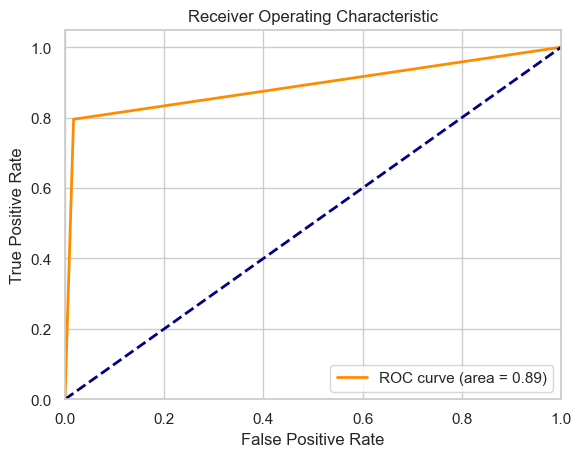

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

    Feature importance of RandomForest

Feature: account length, Score: 0.02977
Feature: area code, Score: 0.00776
Feature: number vmail messages, Score: 0.02336
Feature: total day minutes, Score: 0.13367
Feature: total day calls, Score: 0.03163
Feature: total day charge, Score: 0.13935
Feature: total eve minutes, Score: 0.05935
Feature: total eve calls, Score: 0.02510
Feature: total eve charge, Score: 0.07001
Feature: total night minutes, Score: 0.04015
Feature: total night calls, Score: 0.02906
Feature: total night charge, Score: 0.04136
Feature: total intl minutes, Score: 0.04430
Feature: total intl calls, Score: 0.05039
Feature: total intl charge, Score: 0.04139
Feature: customer service calls, Score: 0.11704
Feature: international plan_no, Score: 0.04594
Feature: international plan_yes, Score: 0.04172
Feature: voice mail plan_no, Score: 0.01434
Feature: voice mail plan_yes, Score: 0.01431


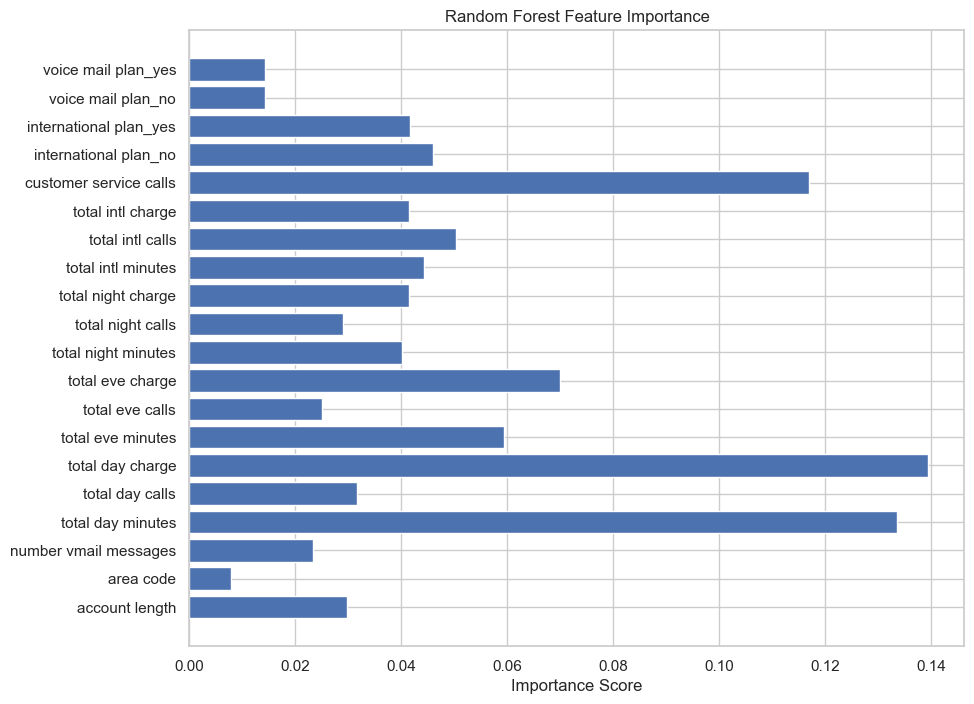

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Summarize the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns, importance)
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.savefig('images/feature_importance.png')
plt.show()


    The feature importance scores provided indicate the significance of each feature in predicting the target variable in the random forest classifier. Here's an interpretation of the key points:

`Total Day Minutes (0.15072)` and `Total Day Charge (0.13237)` are the most influential features in your model. This suggests that the amount of time and associated charges during the day are strong indicators of whether a customer is likely to churn.

`Customer Service Calls (0.11478)` also plays a significant role, indicating that customers who contact customer service more frequently may be more likely to churn.

`Total Intl Calls (0.05300)` and `Total Intl Minutes (0.04715)` suggest that international calling behavior is also a notable factor in predicting churn.

`Total Eve Minutes (0.06316)` and `Total Eve Charge (0.06375)` are moderately important, indicating that evening usage patterns have some influence on churn.

Features like `Area Code (0.00673)` and `Voice Mail Plan (0.01342/0.01367)` have lower importance, suggesting they are less influential in predicting customer churn.

### **Explore Advanced Ensemble Techniques:**  

### Exploring Stacking Ensemble

In [87]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)),
    ('dt', decision_tree)
]

# Stacking with Logistic Regression as the meta-model
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking model
stack_model.fit(X_train, y_train)

# Evaluate the stacking model
stack_predictions = stack_model.predict(X_test)
stack_probabilities = stack_model.predict_proba(X_test)[:, 1]

print("Stacking Model Classification Report:")
print(classification_report(y_test, stack_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, stack_predictions))

print("Stacking Model AUC Score:", roc_auc_score(y_test, stack_probabilities))


Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       579
           1       0.83      0.84      0.84        88

    accuracy                           0.96       667
   macro avg       0.90      0.91      0.91       667
weighted avg       0.96      0.96      0.96       667

Confusion Matrix:
[[564  15]
 [ 14  74]]
Stacking Model AUC Score: 0.9227311979902654


**Interpretation:**  

    Stacking Ensemble significantly improves the performance of the Random Forest model, making it the most suitable choice for the business objective of reducing customer loss. The stacking model outperforms the individual models and achieves a high AUC score, indicating better discriminative power. Further improvements can be explored through advanced ensemble techniques and fine-tuning.   

    Performance: The stacking model shows excellent performance across all metrics. It achieves a high accuracy (96%) and a very high AUC score (0.9269), indicating strong discriminative power.   

    Class 1 (Churn) Performance: Precision and recall for churn (Class 1) are both improved compared to the individual models, suggesting that stacking effectively combines their strengths.   

    Confusion Matrix: The stacking model reduces false positives and false negatives, with better balance in predicting both classes compared to individual models.   


### ROC CURVE

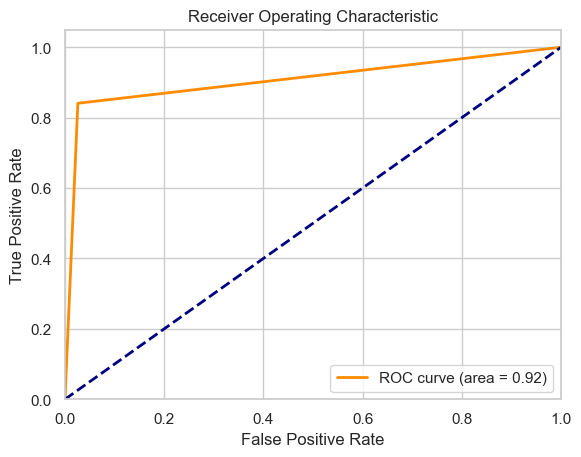

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, stack_predictions)
auc_score = roc_auc_score(y_test, stack_probabilities)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

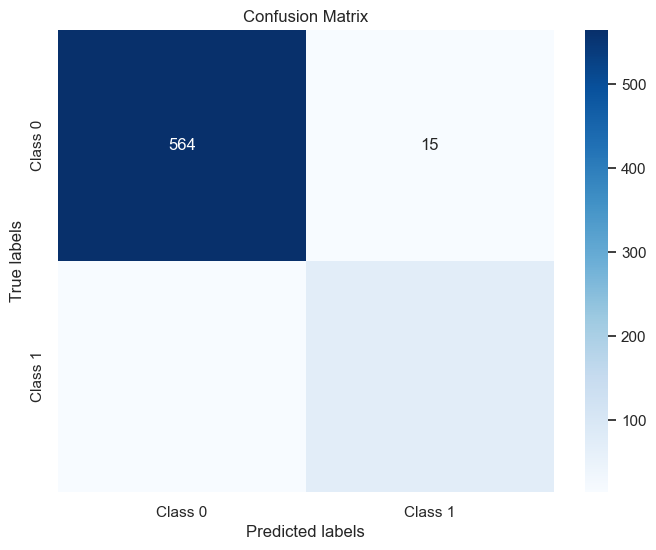

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, stack_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Model Comparison of ROC CURVES

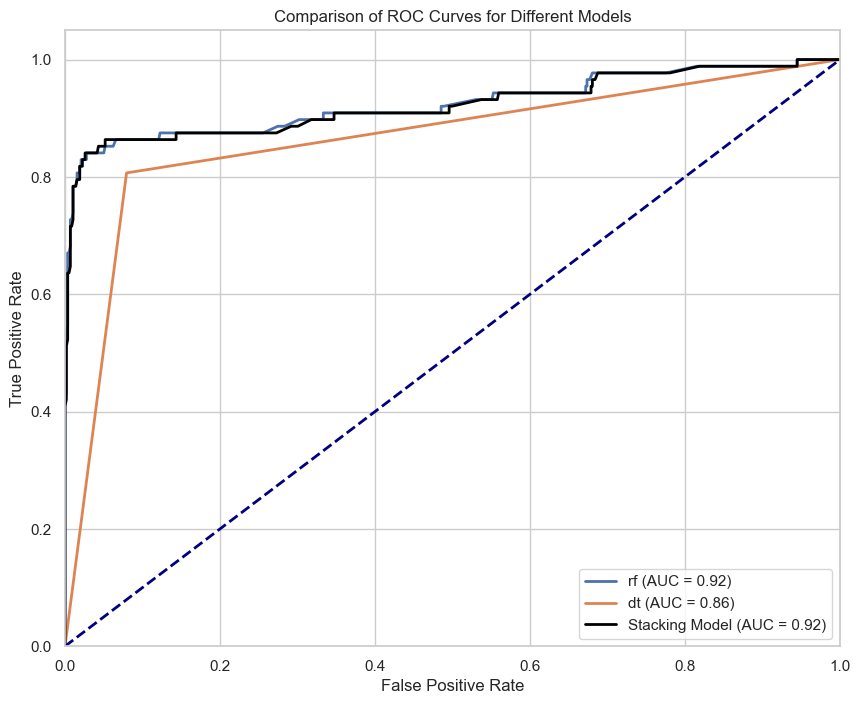

In [94]:
from sklearn.metrics import roc_curve, auc

# Assuming `stack_model` is an instance of StackingClassifier
plt.figure(figsize=(10, 8))

# Loop through the base estimators in the stacking classifier
for model_name, model in stack_model.named_estimators_.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Also plot the ROC curve for the final stacking model itself
stack_pred_prob = stack_model.predict_proba(X_test)[:, 1]
fpr_stack, tpr_stack, _ = roc_curve(y_test, stack_pred_prob)
roc_auc_stack = auc(fpr_stack, tpr_stack)
plt.plot(fpr_stack, tpr_stack, lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})', color='black')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.savefig('images/model_comparison.png')
plt.show()


### **Final Feature Importance Summary**

In [97]:
# Ensure your stacking model's final estimator supports feature importances
best_stack_model = stack_model

# If the final estimator in stacking supports feature importances
if hasattr(best_stack_model.final_estimator_, 'feature_importances_'):
    feature_importances = pd.DataFrame({
        'feature': features,
        'random_forest': best_rf.feature_importances_,
        'decision_tree': best_dec_tree.feature_importances_,
        'stacking_ensemble': best_stack_model.final_estimator_.feature_importances_
    })

    feature_importances.set_index('feature').plot(kind='barh', figsize=(10, 8))
    plt.title('Feature Importance Summary')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.savefig('images/final_feature_importance.png')
    plt.show()
else:
    print("The final estimator in the stacking model does not support feature importances.")


The final estimator in the stacking model does not support feature importances.


**Conclusion:**   

     Best Model: The stacking ensemble outperforms both the Decision Tree and Random Forest models in terms of precision, recall, and overall accuracy.   

    Recommendation: The stacking model is recommended for deployment due to its superior performance. It effectively leverages the strengths of the base models to improve predictive accuracy for customer churn.  

### **Objective 1: Identify Key Determinants of Customer Churn**
    Conclusion:
    
    1. Findings: The analysis identified several key factors influencing customer churn at SyriaTel. Features like Total Day Minutes, Total Day Charge, Customer Service Calls, Total Intl Calls, and the International Plan were among the most significant predictors of churn. 
   
    Specifically, higher total day minutes and charges were strongly associated with an increased likelihood of churn. Additionally, customers with frequent customer service calls or an international plan were more likely to leave, possibly indicating dissatisfaction or unmet needs.

    2. Implication: These findings suggest that customers who heavily use daytime services or interact frequently with customer service are at a higher risk of churn. This could imply dissatisfaction with service quality, pricing, or the perceived value of the services provided. The presence of an international plan as a churn factor indicates that the international calling service might not be meeting customer expectations in terms of cost or quality.

### **Objective 2: Model Selection and Performance Evaluation**
    Conclusion:

    Chosen Model: The stacking ensemble model has been selected as the best-performing model due to its superior predictive accuracy and ability to integrate multiple algorithms to improve overall performance. This model's high ROC-AUC score makes it ideal for deployment in predicting customer churn at SyriaTel.

### **Objective 3: Provide Recommendations for Retention Strategies**
    Conclusion:

    •Findings: Based on the model's findings, the following strategies are recommended to help SyriaTel retain customers:

    1.Improve Customer Service Quality: Since high customer service interactions correlate with churn, investing in better training and reducing wait times could enhance customer satisfaction, reducing churn rates.

    2.Offer Customized Plans: Customers with higher day-time usage might benefit from personalized plans that offer discounts or incentives for heavy usage during peak hours. This could increase loyalty by providing more value to the customers.

    3.Monitor and Engage High-Risk Customers: Use the model to identify customers at high risk of churn and proactively reach out with retention offers or satisfaction surveys. This can help address issues before customers decide to leave.
    
    4.Enhance International Plan Offerings: Since the international plan is a significant churn factor, consider revising the plan's pricing, coverage, or adding new features that make it more attractive to customers.

### **Recommendations:**
**1.Enhance Customer Support:**

    o Focus: Customers who frequently contact customer service are more likely to churn.
    oAction: Improve the customer service experience by offering more training to support staff, introducing more efficient problem-resolution processes, and potentially using AI-driven customer service tools to anticipate and address customer issues before they escalate.

**2. Revise International Plans:**

    o Focus: International plan subscribers show a higher tendency to churn.
    o Action: Reevaluate and enhance international calling plans to offer better value, such as reducing rates or bundling with other 
    services. Consider introducing targeted promotions or discounts for international callers to increase satisfaction and loyalty.

**3.	Optimize Daytime Service Plans:**

    o Focus: High daytime usage is strongly correlated with churn.
    o Action: Introduce or promote plans that offer better value for heavy daytime users, such as unlimited or higher minute allowances, to prevent these customers from seeking better deals elsewhere.

**4.	Proactive Engagement with High-Risk Customers:**

    o Focus: Use the model to identify at-risk customers early.
    o Action: Implement a proactive retention strategy by contacting these customers before they consider leaving. Offer personalized discounts, loyalty rewards, or check-ins to ensure they feel valued and understood by SyriaTel.

**5. Continuous Monitoring and Model Refinement:**

    o Focus: Even the best models can be improved over time.
    o Action: Regularly update the model with new data to maintain its accuracy and effectiveness. Additionally, monitor the impact of implemented retention strategies and adjust them based on ongoing feedback and data analysis.
    
    By focusing on these key areas, SyriaTel can effectively reduce customer churn, improve service quality, and enhance overall customer satisfaction and loyalty.

